<center>
<h1> Logistic Regression Case Study
</center>

### Steps for Regression Modeling:
    BUSINESS PROBLEM:

Your taskto build network intrusion detection systemto detect anamolies and attacks in the network. There are two problems.

1. Binomial Classification:Activityis normal or attack
2. Multinomial classification:Activityis normal or DOSor PROBE or R2L or U2R

Please note that, currently the dependent variable (target variable) is not definied explicitly. However, you canuse attackvariable to define the target variable as required.


In [1]:
## Basic Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

## Feature selection and Logistic regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz, export
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

# Feature Selection based on importance
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices


##Pandas profiling package
import pandas_profiling

from matplotlib.backends.backend_pdf import PdfPages

C:\Users\ZomAdmin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
namss=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot",
       "num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", 
       "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","count","srv_count","serror_rate", 
       "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate",
"srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate",
 "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", 
 "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [3]:
Train=pd.read_table('C:/Users/ZomAdmin/Desktop/Data Science with python/Python Session 28/MAIN CASE STUDIES - ML/3. Network Intrusion Detection System/NSL_Dataset/Train.txt',sep = ',',names = namss)

In [4]:
Test=pd.read_csv('C:/Users/ZomAdmin/Desktop/Data Science with python/Python Session 28/MAIN CASE STUDIES - ML/3. Network Intrusion Detection System/NSL_Dataset/Test.txt',sep = ',',names = namss)

In [222]:
Train.shape

(125973, 43)

In [223]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [8]:
Test.shape

(22544, 43)

In [9]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

### Complete profiling of data

In [10]:
pandas_profiling.ProfileReport(Train,minimal= True) ## Profiling of Train Dataset

In [11]:
pandas_profiling.ProfileReport(Test,minimal = True) ## Profiling of Test data set

In [12]:
Train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag'],
      dtype='object')

In [13]:
Train[['attack']]

attack
0        normal
1        normal
2       neptune
3        normal
4        normal
...         ...
125968  neptune
125969   normal
125970   normal
125971  neptune
125972   normal

[125973 rows x 1 columns]

## Defining Y variables

In [5]:
### Here we have distinguished the attack for normal we have marked as 0 and for any attack we have marked as 1
Train['attack_type']=pd.Series(np.where(Train.attack =='normal',0,1))

In [225]:
Train.attack_type.value_counts()

0    67343
1    58630
Name: attack_type, dtype: int64

In [226]:
Test.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag'],
      dtype='object')

In [7]:
### Here we have distinguished the attack for normal we have marked as 0 and for any attack we have marked as 1
Test['attack_type']=pd.Series(np.where(Test.attack =='normal',0,1))

In [228]:
Test.attack_type.value_counts()

1    12833
0     9711
Name: attack_type, dtype: int64

<center>
<h1>EXPLORATORY DATA ANALYSIS

In [9]:
Train.describe(include='object')

protocol_type service    flag  attack
count         125973  125973  125973  125973
unique             3      70      11      23
top              tcp    http      SF  normal
freq          102689   40338   74945   67343

In [230]:
Test.describe(include='object')

protocol_type service   flag  attack
count          22544   22544  22544   22544
unique             3      64     11      38
top              tcp    http     SF  normal
freq           18880    7853  14875    9711

In [8]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

## Data Seggragation

In [14]:
Train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag', 'attack_type'],
      dtype='object')

## Training dataset seggragation

In [10]:
cat_var = ['protocol_type','service','flag','attack']

In [11]:
cont_var=list(Train.columns.difference(['attack','protocol_type','service','flag']))

In [12]:
cat_var_train = Train[cat_var]
cont_var_train=Train[cont_var]

In [13]:
cat_var_train.head(1)

protocol_type   service flag  attack
0           tcp  ftp_data   SF  normal

In [236]:
cont_var_train.head(1)

attack_type  count  diff_srv_rate  dst_bytes  dst_host_count  \
0            0      2            0.0          0             150   

   dst_host_diff_srv_rate  dst_host_rerror_rate  dst_host_same_src_port_rate  \
0                    0.03                  0.05                         0.17   

   dst_host_same_srv_rate  dst_host_serror_rate  ...  same_srv_rate  \
0                    0.17                   0.0  ...            1.0   

   serror_rate  src_bytes  srv_count  srv_diff_host_rate  srv_rerror_rate  \
0          0.0        491          2                 0.0              0.0   

   srv_serror_rate  su_attempted  urgent  wrong_fragment  
0              0.0             0       0               0  

[1 rows x 40 columns]

## Testing dataset Seggragation

In [14]:
Test.describe(include='object')

protocol_type service   flag  attack
count          22544   22544  22544   22544
unique             3      64     11      38
top              tcp    http     SF  normal
freq           18880    7853  14875    9711

In [238]:
Test.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag', 'attack_type'],
      dtype='object')

In [15]:
cat_var_test = Test[cat_var]
cont_var_test = Test[cont_var]

In [19]:
cat_var_test.head(1)

protocol_type  service flag   attack
0           tcp  private  REJ  neptune

In [240]:
cont_var_test.head(1)

attack_type  count  diff_srv_rate  dst_bytes  dst_host_count  \
0            1    229           0.06          0             255   

   dst_host_diff_srv_rate  dst_host_rerror_rate  dst_host_same_src_port_rate  \
0                    0.06                   1.0                          0.0   

   dst_host_same_srv_rate  dst_host_serror_rate  ...  same_srv_rate  \
0                    0.04                   0.0  ...           0.04   

   serror_rate  src_bytes  srv_count  srv_diff_host_rate  srv_rerror_rate  \
0          0.0          0         10                 0.0              1.0   

   srv_serror_rate  su_attempted  urgent  wrong_fragment  
0              0.0             0       0               0  

[1 rows x 40 columns]

### Continous data

### Outliers

In [241]:
round(cont_var_train.apply(lambda x: continuous_var_summary(x)),2) ## We have detected outliers here:

attack_type        count  diff_srv_rate     dst_bytes  dst_host_count  \
N         125973.00    125973.00      125973.00  1.259730e+05       125973.00   
NMISS          0.00         0.00           0.00  0.000000e+00            0.00   
SUM        58630.00  10595281.00        7942.93  2.491634e+09     22945849.00   
MEAN           0.47        84.11           0.06  1.977911e+04          182.15   
MEDIAN         0.00        14.00           0.00  0.000000e+00          255.00   
STD            0.50       114.51           0.18  4.021269e+06           99.21   
VAR            0.25     13112.22           0.03  1.617061e+13         9841.87   
MIN            0.00         0.00           0.00  0.000000e+00            0.00   
P1             0.00         1.00           0.00  0.000000e+00            1.00   
P5             0.00         1.00           0.00  0.000000e+00            3.00   
P10            0.00         1.00           0.00  0.000000e+00           11.00   
P25            0.00         2.00           0.00  0.000000e+00           82.00   
P50            0.00        14.00           0.00  0.000000e+00          255.00   
P75            1.00       143.00           0.06  5.160000e+02          255.00   
P90            1.00       256.00           0.07  3.375800e+03          255.00   
P95            1.00       286.00           0.29  8.314000e+03          255.00   
P99            1.00       511.00           1.00  2.551900e+04          255.00   
MAX            1.00       511.00           1.00  1.309937e+09          255.00   

        dst_host_diff_srv_rate  dst_host_rerror_rate  \
N                    125973.00             125973.00   
NMISS                     0.00                  0.00   
SUM                   10449.60              14969.60   
MEAN                      0.08                  0.12   
MEDIAN                    0.02                  0.00   
STD                       0.19                  0.31   
VAR                       0.04                  0.09   
MIN                       0.00                  0.00   
P1                        0.00                  0.00   
P5                        0.00                  0.00   
P10                       0.00                  0.00   
P25                       0.00                  0.00   
P50                       0.02                  0.00   
P75                       0.07                  0.00   
P90                       0.10                  0.84   
P95                       0.56                  1.00   
P99                       1.00                  1.00   
MAX                       1.00                  1.00   

        dst_host_same_src_port_rate  dst_host_same_srv_rate  \
N                         125973.00               125973.00   
NMISS                          0.00                    0.00   
SUM                        18691.73                65662.38   
MEAN                           0.15                    0.52   
MEDIAN                         0.00                    0.51   
STD                            0.31                    0.45   
VAR                            0.10                    0.20   
MIN                            0.00                    0.00   
P1                             0.00                    0.00   
P5                             0.00                    0.00   
P10                            0.00                    0.01   
P25                            0.00                    0.05   
P50                            0.00                    0.51   
P75                            0.06                    1.00   
P90                            0.84                    1.00   
P95                            1.00                    1.00   
P99                            1.00                    1.00   
MAX                            1.00                    1.00   

        dst_host_serror_rate  ...  same_srv_rate  serror_rate     src_bytes  \
N                  125973.00  ...      125973.00    125973.00  1.259730e+05   
NMISS                   0.00  ...           0.0

In [17]:
## Clipped outliers as 0.01 for lower limit and 0.99 for upper limit
cont_var_train = cont_var_train.apply(lambda x: x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99)))

In [245]:
round(cont_var_train.apply(lambda x: continuous_var_summary(x)),2).tail(2) ## Outliers have been treated here

attack_type  count  diff_srv_rate  dst_bytes  dst_host_count  \
P99          1.0  511.0            1.0    25519.0           255.0   
MAX          1.0  511.0            1.0    25519.0           255.0   

     dst_host_diff_srv_rate  dst_host_rerror_rate  \
P99                     1.0                   1.0   
MAX                     1.0                   1.0   

     dst_host_same_src_port_rate  dst_host_same_srv_rate  \
P99                          1.0                     1.0   
MAX                          1.0                     1.0   

     dst_host_serror_rate  ...  same_srv_rate  serror_rate  src_bytes  \
P99                   1.0  ...            1.0          1.0    54540.0   
MAX                   1.0  ...            1.0          1.0    54540.0   

     srv_count  srv_diff_host_rate  srv_rerror_rate  srv_serror_rate  \
P99      492.0                 1.0              1.0              1.0   
MAX      492.0                 1.0              1.0              1.0   

     su_attempted  urgent  wrong_fragment  
P99           0.0     0.0             0.0  
MAX           0.0     0.0             0.0  

[2 rows x 40 columns]

### Test dataset

In [246]:
round(cont_var_test.apply(lambda x: continuous_var_summary(x)),2) ## We have detected outliers here:

attack_type       count  diff_srv_rate    dst_bytes  dst_host_count  \
N          22544.00    22544.00       22544.00     22544.00        22544.00   
NMISS          0.00        0.00           0.00         0.00            0.00   
SUM        12833.00  1781616.00        2120.80  32172230.77      4370593.00   
MEAN           0.57       79.03           0.09      1427.09          193.87   
MEDIAN         1.00        8.00           0.00        46.00          255.00   
STD            0.50      128.54           0.26      3872.78           94.04   
VAR            0.25    16522.33           0.07  14998430.15         8842.69   
MIN            0.00        1.00           0.00         0.00            1.00   
P1             0.00        1.00           0.00         0.00            1.00   
P5             0.00        1.00           0.00         0.00            6.00   
P10            0.00        1.00           0.00         0.00           20.00   
P25            0.00        1.00           0.00         0.00          121.00   
P50            1.00        8.00           0.00        46.00          255.00   
P75            1.00      123.25           0.06       601.00          255.00   
P90            1.00      256.00           0.09      4099.10          255.00   
P95            1.00      400.85           1.00      8314.00          255.00   
P99            1.00      511.00           1.00     26004.33          255.00   
MAX            1.00      511.00           1.00     26014.39          255.00   

        dst_host_diff_srv_rate  dst_host_rerror_rate  \
N                     22544.00              22544.00   
NMISS                     0.00                  0.00   
SUM                    2041.13               5261.43   
MEAN                      0.09                  0.23   
MEDIAN                    0.01                  0.00   
STD                       0.22                  0.39   
VAR                       0.05                  0.15   
MIN                       0.00                  0.00   
P1                        0.00                  0.00   
P5                        0.00                  0.00   
P10                       0.00                  0.00   
P25                       0.00                  0.00   
P50                       0.01                  0.00   
P75                       0.06                  0.36   
P90                       0.15                  1.00   
P95                       0.75                  1.00   
P99                       1.00                  1.00   
MAX                       1.00                  1.00   

        dst_host_same_src_port_rate  dst_host_same_srv_rate  \
N                          22544.00                22544.00   
NMISS                          0.00                    0.00   
SUM                         2981.69                13723.02   
MEAN                           0.13                    0.61   
MEDIAN                         0.00                    0.92   
STD                            0.31                    0.44   
VAR                            0.09                    0.19   
MIN                            0.00                    0.00   
P1                             0.00                    0.00   
P5                             0.00                    0.00   
P10                            0.00                    0.02   
P25                            0.00                    0.07   
P50                            0.00                    0.92   
P75                            0.03                    1.00   
P90                            0.85                    1.00   
P95                            1.00                    1.00   
P99                            1.00                    1.00   
MAX                            1.00                    1.00   

        dst_host_serror_rate  ...  same_srv_rate  serror_rate     src_bytes  \
N                   22544.00  ...       22544.00     22544.00  2.254400e+04   
NMISS                   0.00  ...           0.00         0.00  0.000000e+00   
SUM   

In [18]:
## Clipped outliers as 0.01 for lower limit and 0.99 for upper limit
cont_var_test = cont_var_test.apply(lambda x: x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99)))

In [248]:
round(cont_var_test.apply(lambda x: continuous_var_summary(x)),2).tail(2) ## Outliers have been treated

attack_type  count  diff_srv_rate  dst_bytes  dst_host_count  \
P99          1.0  511.0            1.0   25998.60           255.0   
MAX          1.0  511.0            1.0   26004.33           255.0   

     dst_host_diff_srv_rate  dst_host_rerror_rate  \
P99                     1.0                   1.0   
MAX                     1.0                   1.0   

     dst_host_same_src_port_rate  dst_host_same_srv_rate  \
P99                          1.0                     1.0   
MAX                          1.0                     1.0   

     dst_host_serror_rate  ...  same_srv_rate  serror_rate  src_bytes  \
P99                   1.0  ...            1.0          1.0   283618.0   
MAX                   1.0  ...            1.0          1.0   283618.0   

     srv_count  srv_diff_host_rate  srv_rerror_rate  srv_serror_rate  \
P99      511.0                 1.0              1.0              1.0   
MAX      511.0                 1.0              1.0              1.0   

     su_attempted  urgent  wrong_fragment  
P99           0.0     0.0             0.0  
MAX           0.0     0.0             0.0  

[2 rows x 40 columns]

## Missing values

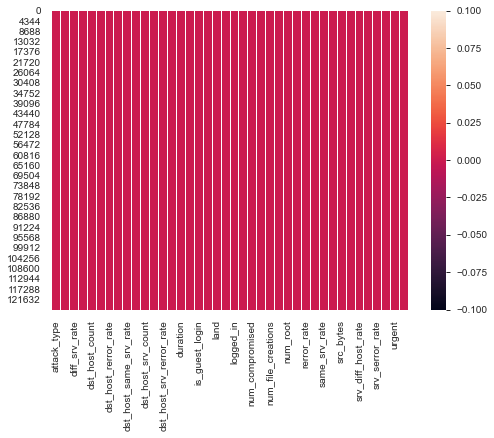

In [25]:
sns.heatmap(cont_var_train.isna()) ## We can see there are no missing values in data

In [40]:
cont_var_train.isna().sum() ## No missing values are found

attack_type                    0
count                          0
diff_srv_rate                  0
dst_bytes                      0
dst_host_count                 0
dst_host_diff_srv_rate         0
dst_host_rerror_rate           0
dst_host_same_src_port_rate    0
dst_host_same_srv_rate         0
dst_host_serror_rate           0
dst_host_srv_count             0
dst_host_srv_diff_host_rate    0
dst_host_srv_rerror_rate       0
dst_host_srv_serror_rate       0
duration                       0
hot                            0
is_guest_login                 0
is_host_login                  0
land                           0
last_flag                      0
logged_in                      0
num_access_files               0
num_compromised                0
num_failed_logins              0
num_file_creations             0
num_outbound_cmds              0
num_root                       0
num_shells                     0
rerror_rate                    0
root_shell                     0
same_srv_r

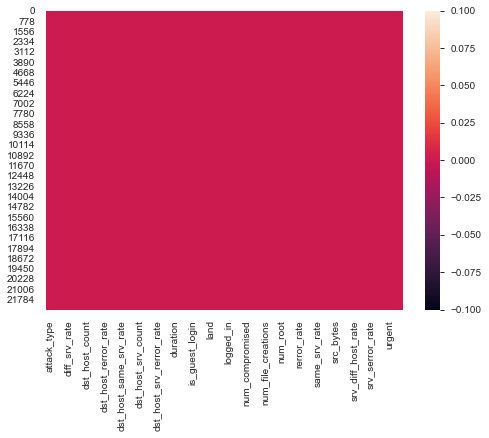

In [41]:
sns.heatmap(cont_var_test.isna())  # No missing values

In [42]:
cont_var_test.isna().sum()

attack_type                    0
count                          0
diff_srv_rate                  0
dst_bytes                      0
dst_host_count                 0
dst_host_diff_srv_rate         0
dst_host_rerror_rate           0
dst_host_same_src_port_rate    0
dst_host_same_srv_rate         0
dst_host_serror_rate           0
dst_host_srv_count             0
dst_host_srv_diff_host_rate    0
dst_host_srv_rerror_rate       0
dst_host_srv_serror_rate       0
duration                       0
hot                            0
is_guest_login                 0
is_host_login                  0
land                           0
last_flag                      0
logged_in                      0
num_access_files               0
num_compromised                0
num_failed_logins              0
num_file_creations             0
num_outbound_cmds              0
num_root                       0
num_shells                     0
rerror_rate                    0
root_shell                     0
same_srv_r

### VISUALIZATION

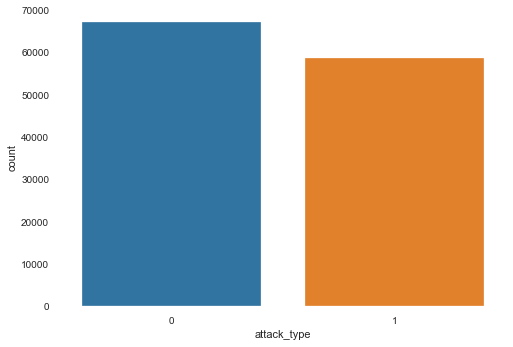

In [43]:
### Graphical visulization of cases where virus has attacked or there was no attack.
sns.countplot(cont_var_train.attack_type)

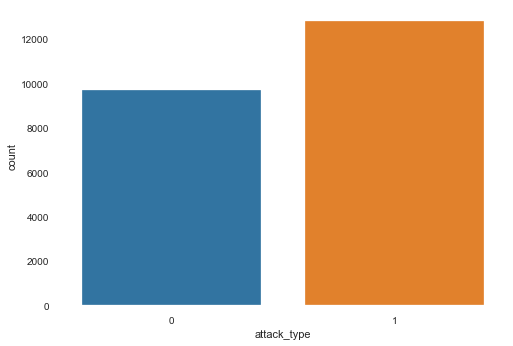

In [44]:
sns.countplot(cont_var_test.attack_type)

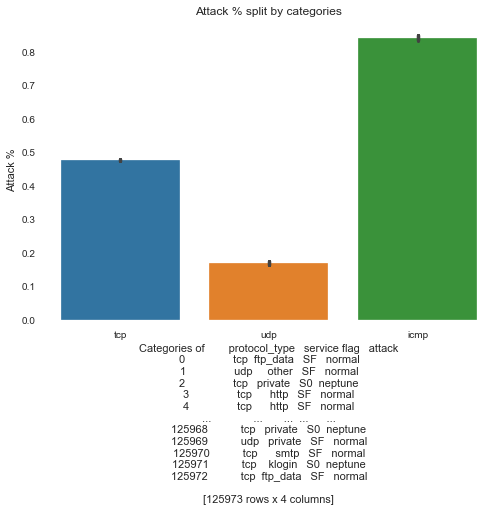

In [59]:
#creating bar plot between protocol_type and attack to see which protocol is most vulnerable to attack

bp = PdfPages('Attack Plots by Categorical Variable.pdf')

for cat_variable in cat_var_train:
    sns.barplot(x='protocol_type',y='attack_type',data=Train) 
    plt.ylabel('Attack %')
    plt.xlabel(str('Categories of ') + str(cat_var_train))
    plt.title('Attack % split by categories')
    

bp.close()

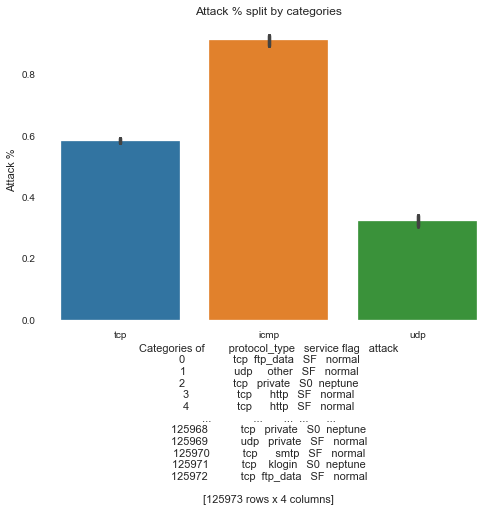

In [60]:
#creating bar plot between protocol_type and attack to see which protocol is most vulnerable to attack

bp = PdfPages('Attack Plots by Categorical Variable.pdf')

for cat_variable in cat_var_train:
    sns.barplot(x='protocol_type',y='attack_type',data=Test) 
    plt.ylabel('Attack %')
    plt.xlabel(str('Categories of ') + str(cat_var_train))
    plt.title('Attack % split by categories')


bp.close()

## Dummy variables 

In [249]:
cat_var_train.isna().sum() ## No missing values 

protocol_type    0
service          0
flag             0
attack           0
dtype: int64

In [22]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [23]:
cat_var_train.columns

Index(['protocol_type', 'service', 'flag'], dtype='object')

In [24]:
cat_var_train=cat_var_train[['protocol_type','service','flag']]

In [25]:
for c_feature in cat_var_train.columns:
    
    cat_var_train[c_feature] = cat_var_train[c_feature].astype('category')
    
    cat_var_train = create_dummies(cat_var_train, c_feature) 

In [254]:
cat_var_train.count()

protocol_type_tcp    125973
protocol_type_udp    125973
service_X11          125973
service_Z39_50       125973
service_aol          125973
                      ...  
flag_S1              125973
flag_S2              125973
flag_S3              125973
flag_SF              125973
flag_SH              125973
Length: 81, dtype: int64

### Dummies in test

In [26]:
cat_var_test=cat_var_test[['protocol_type','service','flag']]

In [27]:
for c_feature in cat_var_test.columns:
    
    cat_var_test[c_feature] = cat_var_test[c_feature].astype('category')
    
    cat_var_test = create_dummies(cat_var_test, c_feature) 

In [28]:
cat_var_test.shape

(22544, 75)

## Preparing final dataset for machine learning

In [29]:
train_final = pd.concat([cont_var_train,cat_var_train],axis = 1 )

In [30]:
train_final.shape

(125973, 121)

In [31]:
train_final.head(1)

attack_type  count  diff_srv_rate  dst_bytes  dst_host_count  \
0            0      2            0.0          0             150   

   dst_host_diff_srv_rate  dst_host_rerror_rate  dst_host_same_src_port_rate  \
0                    0.03                  0.05                         0.17   

   dst_host_same_srv_rate  dst_host_serror_rate  ...  flag_REJ  flag_RSTO  \
0                    0.17                   0.0  ...         0          0   

   flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  \
0            0          0        0        0        0        0        1   

   flag_SH  
0        0  

[1 rows x 121 columns]

### Test 

In [33]:
test_final = pd.concat([cont_var_test,cat_var_test],axis = 1 )

In [34]:
test_final.shape

(22544, 115)

In [35]:
test_final.head(1)

attack_type  count  diff_srv_rate  dst_bytes  dst_host_count  \
0            1    229           0.06        0.0             255   

   dst_host_diff_srv_rate  dst_host_rerror_rate  dst_host_same_src_port_rate  \
0                    0.06                   1.0                          0.0   

   dst_host_same_srv_rate  dst_host_serror_rate  ...  flag_REJ  flag_RSTO  \
0                    0.04                   0.0  ...         1          0   

   flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  \
0            0          0        0        0        0        0        0   

   flag_SH  
0        0  

[1 rows x 115 columns]

In [36]:
#These are the variables which are present in train data but not in test data

unique=set(train_final.columns.tolist())-set(test_final.columns.tolist())
unique

{'service_aol',
 'service_harvest',
 'service_http_2784',
 'service_http_8001',
 'service_red_i',
 'service_urh_i'}

In [37]:
#Here we dropped all those uncomman variables from train data

train_final=train_final.drop(['service_aol','service_harvest','service_http_2784','service_http_8001','service_red_i',
                        'service_urh_i'],axis=1)

## Feature Selection

## Variable Selection with RandomForest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc=RandomForestClassifier()

In [40]:
X_var = list(train_final.columns.difference(['attack_type']))
y = train_final.attack_type

In [269]:
rfc.fit(train_final[X_var],train_final.attack_type)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [270]:
#Calculating the feature importances to choose best variables and dimentionality reduction

scores = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_final[X_var].columns,'importance':scores})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

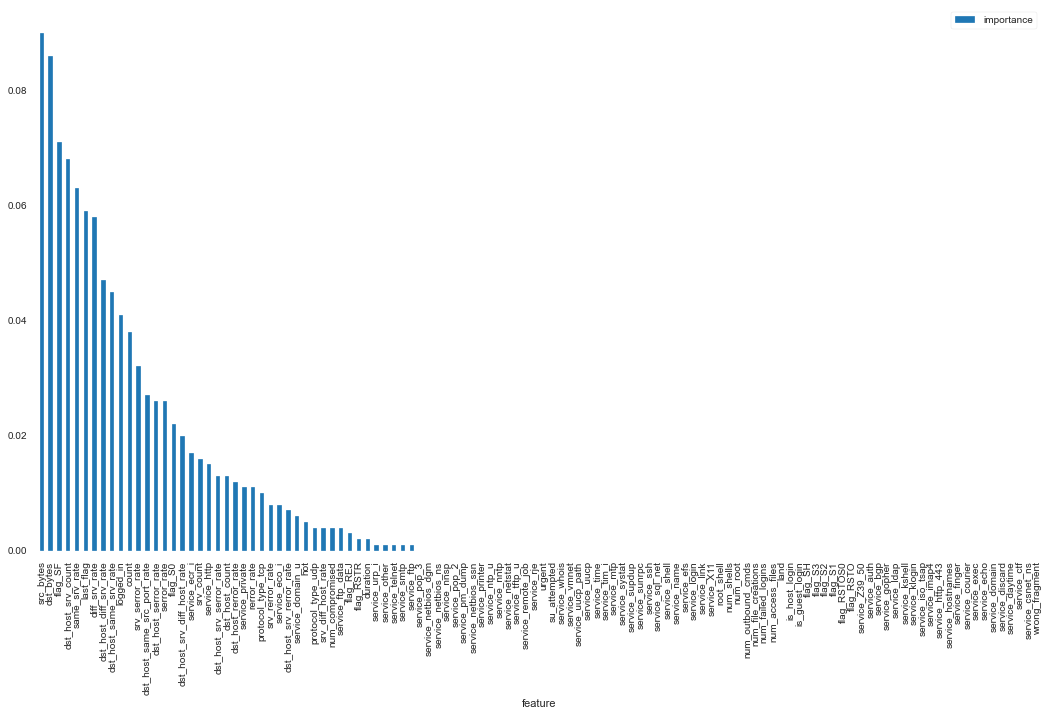

In [271]:
#this is the ranked order of the best variables in descending order
plt.rcParams['figure.figsize'] = (18, 10)
importances.plot.bar() ## This is Showing us 40 variables which are of higher importance

## KBEST AND CHI2

## Statistical tests can be used to select those features which have strongest corelation with target variable

## Scikit learn library provides the SelectKBest class that can be used with suite of different statistical test to select limited number of features

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [42]:
X_var = list(train_final.columns.difference(['attack_type']))
y = train_final.attack_type

In [43]:
best_features = SelectKBest(score_func = chi2,k = 30)

In [44]:
fit = best_features.fit(train_final[X_var],train_final.attack_type)

In [45]:
dfscores = pd.DataFrame(fit.scores_)

In [46]:
dfscores = round(dfscores,1)

In [48]:
dffeatures = pd.DataFrame(train_final[X_var].columns)

In [49]:
df=pd.concat([dffeatures,dfscores],axis = 1)
df.columns = ['features','scores']

In [50]:
df.round(2)

features       scores
0                     count    6525724.8
1             diff_srv_rate       2694.3
2                 dst_bytes  113861826.7
3            dst_host_count     957431.5
4    dst_host_diff_srv_rate       3197.9
..                      ...          ...
109         srv_rerror_rate       6997.5
110         srv_serror_rate      37451.9
111            su_attempted          NaN
112                  urgent          NaN
113          wrong_fragment          NaN

[114 rows x 2 columns]

### Here we are selecting top 50 features based on the statistical test of chi2 and SelectKBest

In [51]:
df_50 = df.sort_values('scores',ascending = False).head(50)

In [52]:
k_features = df_50.features

In [53]:
k_features.count() ## Here we get 50 features

50

## F_REGRESSION

In [109]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [69]:
variables = train_final[k_features]
target = train_final.attack_type

In [70]:
col_ser=pd.Series(variables.columns)

In [71]:
# do the f_regression
F_values, p_values  = f_regression( variables, target )
# combine the output in dataframe
F_regression_op = pd.DataFrame([col_ser, F_values.round(2), p_values.round()]).T

# add the column names
F_regression_op.columns = ['Features', 'F_values', 'p_values', ]

In [72]:
F_regression_op

Features F_values p_values
0                     dst_bytes  11524.9        0
1            dst_host_srv_count   137599        0
2                         count  62689.7        0
3                dst_host_count  20620.1        0
4                     src_bytes     2.45        0
5                      duration    10.86        0
6      dst_host_srv_serror_rate    94646        0
7                       flag_S0  92261.8        0
8               srv_serror_rate  91324.7        0
9                   serror_rate  92481.5        0
10         dst_host_serror_rate  93069.9        0
11                    logged_in   114586        0
12                      flag_SF   168332        0
13                 service_http  58249.6        0
14       dst_host_same_srv_rate   116917        0
15              service_private  31936.5        0
16                same_srv_rate   163867        0
17             service_domain_u   9052.4        0
18              srv_rerror_rate  8651.41        0
19                  rerror_rate  8643.62        0
20     dst_host_srv_rerror_rate  8646.03        0
21         dst_host_rerror_rate  8582.92        0
22                 service_smtp  5946.22        0
23            protocol_type_udp  6236.09        0
24                    last_flag  24614.8        0
25                     flag_REJ   4461.6        0
26                service_eco_i   3573.3        0
27       dst_host_diff_srv_rate  7898.21        0
28                service_ecr_i  2899.37        0
29                diff_srv_rate  5451.04        0
30                    flag_RSTR  2271.88        0
31           srv_diff_host_rate  1821.15        0
32             service_ftp_data  1083.59        0
33               service_Z39_50  1004.86        0
34                    flag_RSTO   996.51        0
35                 service_uucp   907.98        0
36              service_courier   853.75        0
37                  service_bgp    825.5        0
38                service_whois   805.49        0
39            service_uucp_path   800.79        0
40             service_iso_tsap   798.44        0
41                service_imap4   738.38        0
42                 service_nnsp   731.47        0
43                service_vmnet   716.22        0
44  dst_host_same_src_port_rate  1085.82        0
45                  service_ctf   652.93        0
46             service_csnet_ns   631.86        0
47               service_supdup   630.69        0
48              service_discard   623.67        0
49             service_http_443   614.31        0

In [73]:
F_regression_op[F_regression_op.p_values <=0.5]

Features F_values p_values
0                     dst_bytes  11524.9        0
1            dst_host_srv_count   137599        0
2                         count  62689.7        0
3                dst_host_count  20620.1        0
4                     src_bytes     2.45        0
5                      duration    10.86        0
6      dst_host_srv_serror_rate    94646        0
7                       flag_S0  92261.8        0
8               srv_serror_rate  91324.7        0
9                   serror_rate  92481.5        0
10         dst_host_serror_rate  93069.9        0
11                    logged_in   114586        0
12                      flag_SF   168332        0
13                 service_http  58249.6        0
14       dst_host_same_srv_rate   116917        0
15              service_private  31936.5        0
16                same_srv_rate   163867        0
17             service_domain_u   9052.4        0
18              srv_rerror_rate  8651.41        0
19                  rerror_rate  8643.62        0
20     dst_host_srv_rerror_rate  8646.03        0
21         dst_host_rerror_rate  8582.92        0
22                 service_smtp  5946.22        0
23            protocol_type_udp  6236.09        0
24                    last_flag  24614.8        0
25                     flag_REJ   4461.6        0
26                service_eco_i   3573.3        0
27       dst_host_diff_srv_rate  7898.21        0
28                service_ecr_i  2899.37        0
29                diff_srv_rate  5451.04        0
30                    flag_RSTR  2271.88        0
31           srv_diff_host_rate  1821.15        0
32             service_ftp_data  1083.59        0
33               service_Z39_50  1004.86        0
34                    flag_RSTO   996.51        0
35                 service_uucp   907.98        0
36              service_courier   853.75        0
37                  service_bgp    825.5        0
38                service_whois   805.49        0
39            service_uucp_path   800.79        0
40             service_iso_tsap   798.44        0
41                service_imap4   738.38        0
42                 service_nnsp   731.47        0
43                service_vmnet   716.22        0
44  dst_host_same_src_port_rate  1085.82        0
45                  service_ctf   652.93        0
46             service_csnet_ns   631.86        0
47               service_supdup   630.69        0
48              service_discard   623.67        0
49             service_http_443   614.31        0

## VIF

In [284]:
'+'.join(k_features)

'dst_bytes+dst_host_srv_count+count+dst_host_count+src_bytes+duration+dst_host_srv_serror_rate+flag_S0+srv_serror_rate+serror_rate+dst_host_serror_rate+logged_in+flag_SF+service_http+dst_host_same_srv_rate+service_private+same_srv_rate+service_domain_u+srv_rerror_rate+rerror_rate+dst_host_srv_rerror_rate+dst_host_rerror_rate+service_smtp+protocol_type_udp+last_flag+flag_REJ+service_eco_i+dst_host_diff_srv_rate+service_ecr_i+diff_srv_rate+flag_RSTR+srv_diff_host_rate+service_ftp_data+service_Z39_50+flag_RSTO+service_uucp+service_courier+service_bgp+service_whois+service_uucp_path+service_iso_tsap+service_imap4+service_nnsp+service_vmnet+dst_host_same_src_port_rate+service_ctf+service_csnet_ns+service_supdup+service_discard+service_http_443'

In [285]:
from patsy import dmatrices

In [287]:
param='attack_type ~ ' + ' + '.join(k_features)

In [288]:
# separate the Y and X variables
y, X = dmatrices(param, train_final, return_type = 'dataframe' )

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF_Factor'] = [ variance_inflation_factor(X.values, i) for i in range(X.shape[1]) ]

# display the output
vif.round(1).head(1)

Features  VIF_Factor
0  Intercept       612.3

In [61]:
vif.round(1).sort_values('VIF_Factor',ascending = True)

Features  VIF_Factor
50             service_http_443         1.0
34               service_Z39_50         1.0
37              service_courier         1.0
38                  service_bgp         1.0
39                service_whois         1.0
40            service_uucp_path         1.0
41             service_iso_tsap         1.0
43                 service_nnsp         1.0
42                service_imap4         1.0
46                  service_ctf         1.0
47             service_csnet_ns         1.0
48               service_supdup         1.0
44                service_vmnet         1.0
49              service_discard         1.0
36                 service_uucp         1.1
5                     src_bytes         1.2
1                     dst_bytes         1.4
6                      duration         1.6
32           srv_diff_host_rate         1.7
25                    last_flag         1.8
16              service_private         1.9
33             service_ftp_data         1.9
30                diff_srv_rate         2.2
4                dst_host_count         2.3
23                 service_smtp         2.6
28       dst_host_diff_srv_rate         2.8
3                         count         3.0
29                service_ecr_i         3.0
45  dst_host_same_src_port_rate         3.3
27                service_eco_i         4.0
18             service_domain_u         4.6
24            protocol_type_udp         8.1
14                 service_http         9.4
2            dst_host_srv_count         9.7
22         dst_host_rerror_rate        10.3
12                    logged_in        11.4
17                same_srv_rate        11.6
35                    flag_RSTO        11.9
15       dst_host_same_srv_rate        14.2
31                    flag_RSTR        17.5
21     dst_host_srv_rerror_rate        21.3
11         dst_host_serror_rate        47.0
8                       flag_S0        47.3
7      dst_host_srv_serror_rate        66.9
20                  rerror_rate        72.4
26                     flag_REJ        74.4
13                      flag_SF        91.6
19              srv_rerror_rate        96.9
10                  serror_rate       119.1
9               srv_serror_rate       143.6
0                     Intercept       612.3

### Now we will start removing variables in iterations

In [290]:
param='''attack_type ~ dst_bytes+dst_host_srv_count+count+dst_host_count+src_bytes+duration+dst_host_srv_serror_rate+flag_S0+dst_host_serror_rate+logged_in+service_http+dst_host_same_srv_rate+service_private+same_srv_rate+service_domain_u+rerror_rate+dst_host_srv_rerror_rate+dst_host_rerror_rate+service_smtp+protocol_type_udp+last_flag+service_eco_i+dst_host_diff_srv_rate+service_ecr_i+diff_srv_rate+flag_RSTR+srv_diff_host_rate+service_ftp_data+service_Z39_50+flag_RSTO+service_uucp+service_courier+service_bgp+service_whois+service_uucp_path+service_iso_tsap+service_imap4+service_nnsp+service_vmnet+dst_host_same_src_port_rate+service_ctf+service_csnet_ns+service_supdup+service_discard+service_http_443'''

In [291]:
# separate the Y and X variables
y, X = dmatrices(param, train_final, return_type = 'dataframe' )

# For each X, calculate VIF and save in dataframe
vif2 = pd.DataFrame()

vif2['Features'] = X.columns
vif2['VIF_Factor'] = [ variance_inflation_factor(X.values, i) for i in range(X.shape[1]) ]

# display the output
vif2.round(1).head(1)

Features  VIF_Factor
0  Intercept       274.6

In [292]:
vif2.round(1).sort_values('VIF_Factor',ascending = True)

Features  VIF_Factor
45             service_http_443         1.0
44              service_discard         1.0
32              service_courier         1.0
33                  service_bgp         1.0
34                service_whois         1.0
29               service_Z39_50         1.0
36             service_iso_tsap         1.0
37                service_imap4         1.0
38                 service_nnsp         1.0
39                service_vmnet         1.0
35            service_uucp_path         1.0
41                  service_ctf         1.0
42             service_csnet_ns         1.0
43               service_supdup         1.0
31                 service_uucp         1.1
5                     src_bytes         1.2
30                    flag_RSTO         1.2
1                     dst_bytes         1.3
6                      duration         1.6
27           srv_diff_host_rate         1.7
13              service_private         1.8
21                    last_flag         1.8
28             service_ftp_data         1.9
4                dst_host_count         2.2
25                diff_srv_rate         2.2
26                    flag_RSTR         2.2
19                 service_smtp         2.6
23       dst_host_diff_srv_rate         2.7
3                         count         3.0
24                service_ecr_i         3.0
40  dst_host_same_src_port_rate         3.3
22                service_eco_i         3.9
15             service_domain_u         4.6
20            protocol_type_udp         7.8
11                 service_http         9.3
2            dst_host_srv_count         9.7
18         dst_host_rerror_rate        10.1
10                    logged_in        10.9
14                same_srv_rate        11.3
12       dst_host_same_srv_rate        14.0
17     dst_host_srv_rerror_rate        17.8
16                  rerror_rate        19.7
8                       flag_S0        35.1
9          dst_host_serror_rate        40.5
7      dst_host_srv_serror_rate        51.3
0                     Intercept       274.6

### Iteration 3

In [54]:
param='''attack_type ~ dst_bytes+dst_host_srv_count+count+dst_host_count+src_bytes+duration+logged_in+service_http+service_private+same_srv_rate+service_domain_u+dst_host_rerror_rate+service_smtp+protocol_type_udp+last_flag+service_eco_i+dst_host_diff_srv_rate+service_ecr_i+diff_srv_rate+flag_RSTR+srv_diff_host_rate+service_ftp_data+service_Z39_50+flag_RSTO+service_uucp+service_courier+service_bgp+service_whois+service_uucp_path+service_iso_tsap+service_imap4+service_nnsp+service_vmnet+dst_host_same_src_port_rate+service_ctf+service_csnet_ns+service_supdup+service_discard+service_http_443'''

In [55]:
# separate the Y and X variables
y, X = dmatrices(param, train_final, return_type = 'dataframe' )

# For each X, calculate VIF and save in dataframe
vif3 = pd.DataFrame()

vif3['Features'] = X.columns
vif3['VIF_Factor'] = [ variance_inflation_factor(X.values, i) for i in range(X.shape[1]) ]

# display the output
vif3.round(1).head(1)

Features  VIF_Factor
0  Intercept       181.3

In [56]:
vif3.shape ## Now we are still left with 40 variables

(40, 2)

In [57]:
vif3.round(1).sort_values('VIF_Factor',ascending = True)

Features  VIF_Factor
39             service_http_443         1.0
23               service_Z39_50         1.0
26              service_courier         1.0
27                  service_bgp         1.0
28                service_whois         1.0
29            service_uucp_path         1.0
38              service_discard         1.0
31                service_imap4         1.0
30             service_iso_tsap         1.0
33                service_vmnet         1.0
35                  service_ctf         1.0
36             service_csnet_ns         1.0
37               service_supdup         1.0
32                 service_nnsp         1.0
25                 service_uucp         1.1
5                     src_bytes         1.2
24                    flag_RSTO         1.2
1                     dst_bytes         1.3
6                      duration         1.6
12         dst_host_rerror_rate         1.6
21           srv_diff_host_rate         1.7
19                diff_srv_rate         1.7
15                    last_flag         1.7
22             service_ftp_data         1.8
9               service_private         1.8
20                    flag_RSTR         1.9
4                dst_host_count         2.0
18                service_ecr_i         2.4
17       dst_host_diff_srv_rate         2.4
13                 service_smtp         2.5
16                service_eco_i         2.9
34  dst_host_same_src_port_rate         3.0
3                         count         3.0
11             service_domain_u         4.2
14            protocol_type_udp         4.5
7                     logged_in         5.5
2            dst_host_srv_count         6.2
8                  service_http         8.2
10                same_srv_rate         8.3
0                     Intercept       181.3

In [58]:
feature_columns3 = list(set(vif3.loc[:, 'Features']).difference(['Intercept']))

### Again running random_forest to see most important features

In [59]:
rfc.fit(train_final[feature_columns3],train_final.attack_type)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
#Calculating the feature importances to choose best variables and dimentionality reduction

scores = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_final[feature_columns3].columns,'importance':scores})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

### This is Showing us 24 variables which are of higher importance

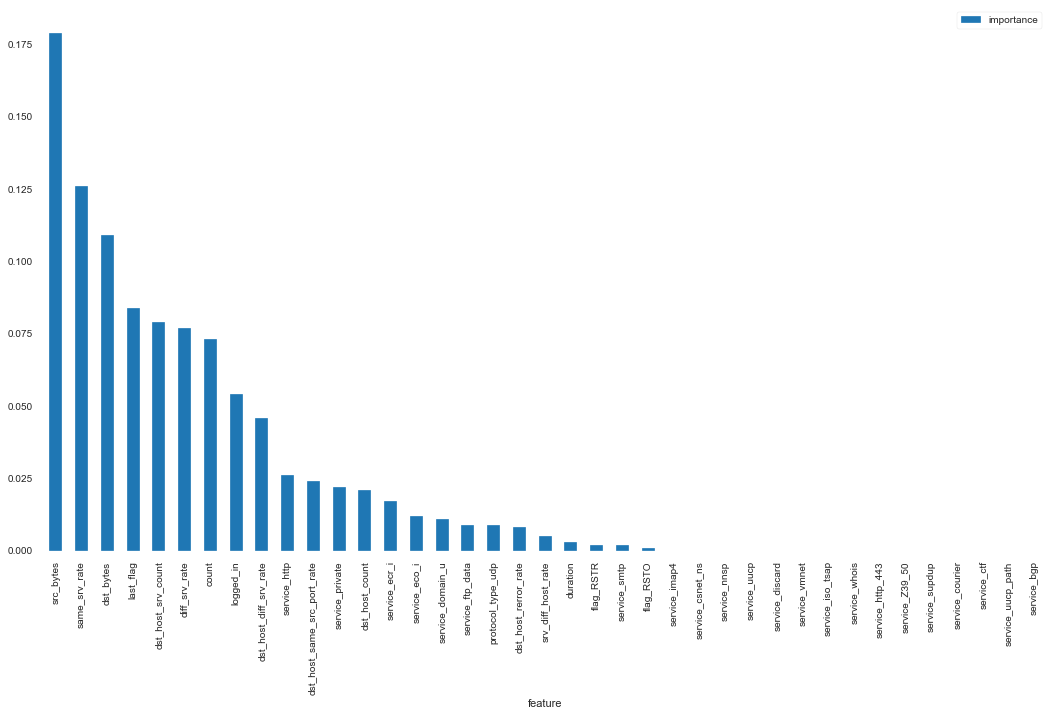

In [61]:
#this is the ranked order of the best variables in descending order
plt.rcParams['figure.figsize'] = (18, 10)
importances.plot.bar()

In [62]:
importances.sort_values('importance',ascending=False).count()

importance    39
dtype: int64

In [63]:
importances.sort_values('importance',ascending=False).head(24)

importance
feature                                
src_bytes                         0.179
same_srv_rate                     0.126
dst_bytes                         0.109
last_flag                         0.084
dst_host_srv_count                0.079
diff_srv_rate                     0.077
count                             0.073
logged_in                         0.054
dst_host_diff_srv_rate            0.046
service_http                      0.026
dst_host_same_src_port_rate       0.024
service_private                   0.022
dst_host_count                    0.021
service_ecr_i                     0.017
service_eco_i                     0.012
service_domain_u                  0.011
service_ftp_data                  0.009
protocol_type_udp                 0.009
dst_host_rerror_rate              0.008
srv_diff_host_rate                0.005
duration                          0.003
service_smtp                      0.002
flag_RSTR                         0.002
flag_RSTO                         0.001

In [64]:
importances_sorted = importances.sort_values('importance',ascending=False).reset_index().head(24)

In [65]:
imp_features = importances_sorted.feature

### Now we will build our model on these 24 variables

In [66]:
imp_features.count() 

24

In [67]:
import statsmodels.formula.api as sm

<center>
<h1>Model Building

In [68]:
logit=LogisticRegression()

### Train and testing splitting

### HAVE DECIDED NOT TO DO TRAIN TEST SPLITTING OF THE DATA AS WE ALREADY HAVE DATA IN TESTING AND TRAINING 

In [69]:
param = 'attack_type ~ ' + '+'.join(imp_features)

In [70]:
param

'attack_type ~ src_bytes+same_srv_rate+dst_bytes+last_flag+dst_host_srv_count+diff_srv_rate+count+logged_in+dst_host_diff_srv_rate+service_http+dst_host_same_src_port_rate+service_private+dst_host_count+service_ecr_i+service_eco_i+service_domain_u+service_ftp_data+protocol_type_udp+dst_host_rerror_rate+srv_diff_host_rate+duration+service_smtp+flag_RSTR+flag_RSTO'

#### We can see here that out Pseudo R-SQ value is higher hence we have created good model

In [71]:
logreg = sm.logit(formula = param, data=train_final)
result = logreg.fit()
summ = result.summary()
summ

Optimization terminated successfully.
         Current function value: 0.068973
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            attack_type   No. Observations:               125973
Model:                          Logit   Df Residuals:                   125948
Method:                           MLE   Df Model:                           24
Date:                Thu, 27 Aug 2020   Pseudo R-squ.:                  0.9001
Time:                        11:31:52   Log-Likelihood:                -8688.8
converged:                       True   LL-Null:                       -87016.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      15.2890      0.211     72.495      0.000      14.876      15.702
src_bytes                    4.933e-05   1.96e-06     25.137      0.000    4.55e-05    5.32e-05
same_srv_rate                  -4.3860      0.085    -51.721      0.000      -4.552      -4.220
dst_bytes                   -3.725e-05   8.99e-06     -4.142      0.000   -5.49e-05   -1.96e-05
last_flag                      -0.7196      0.010    -70.601      0.000      -0.740      -0.700
dst_host_srv_count             -0.0104      0.000    -31.416      0.000      -0.011      -0.010
diff_srv_rate                  -3.4615      0.117    -29.557      0.000      -3.691      -3.232
count                           0.0128      0.000     34.671      0.000       0.012       0.014
logged_in                      -2.9214      0.075    -38.786      0.000      -3.069      -2.774
dst_host_diff_srv_rate          1.4373      0.149      9.621      0.000       1.145       1.730
service_http                    1.1260      0.090     12.568      0.000       0.950       1.302
dst_host_same_src_port_rate     2.2715      0.089     25.654      0.000       2.098       2.445
service_private                 5.2652      0.124     42.432      0.000       5.022       5.508
dst_host_count                  0.0074      0.000     24.138      0.000       0.007       0.008
service_ecr_i                   1.1781      0.127      9.271      0.000       0.929       1.427
service_eco_i                   1.1995      0.105     11.395      0.000       0.993       1.406
service_domain_u               -2.4451      0.583     -4.191      0.000      -3.589      -1.302
service_ftp_data               -0.8697      0.071    -12.196      0.000      -1.010      -0.730
protocol_type_udp              -5.4739      0.125    -43.928      0.000      -5.718      -5.230
dst_host_rerror_rate            0.0436      0.094      0.461      0.645      -0.142       0.229
srv_diff_host_rate              1.7518      0.085     20.707      0.000       1.586       1.918
duration                       -0.0002   2.41e-05     -6.636      0.000      -0.000      -0.000
service_smtp                   -0.8019      0.133     -6.037      0.000      -1.062      -0.542
flag_RSTR                       0.9806      0.248      3.948      0.000       0.494       1.467
flag_RSTO                      -1.2586      0.154     -8.163      0.000      -1.561      -0.956
===============================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Predictions

In [87]:
from sklearn import metrics

In [73]:
train_gini = 2*metrics.roc_auc_score(train_final['attack_type'], result.predict(train_final[imp_features])) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

The Gini Index for the model built on the Train Data is :  0.9924484212727545


In [74]:
## Simple predictions: ## On training data
attack_prediction_train =pd.DataFrame({'actual':train_final.attack_type,'predicted':result.predict(train_final[imp_features])})

In [75]:
attack_prediction_train.head(10) ## Our predictions are good so far

actual  predicted
0       0   0.046094
1       0   0.955200
2       1   0.999938
3       0   0.000184
4       0   0.001938
5       1   0.999636
6       1   0.999878
7       1   0.999648
8       1   0.991792
9       1   0.999800

In [77]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = attack_prediction_train.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['predicted'] = train_temp['predicted'].apply(lambda x: 0 if x < cut_off else 1)
    train_temp['tp'] = train_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==1 else 0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==1 else 0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==0 else 0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==0 else 0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

train_temp.sum() ## Here we are seeing that our model is predicting almost accurate outputs

actual        58630
predicted    125973
tp            58630
fp            67343
tn                0
fn                0
dtype: int64

In [123]:
roc_like_df.columns

Index(['cutoff', 'sensitivity', 'specificity'], dtype='object')

### we dont get any cutoff our predictions are almost accurate

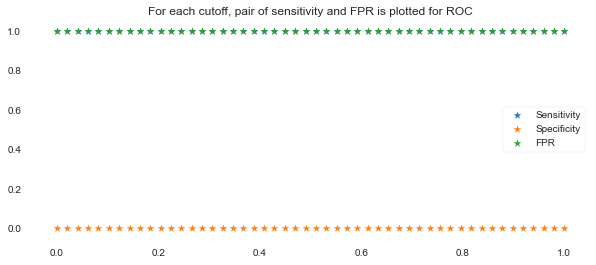

In [78]:
plt.subplots(figsize=(10,4))
plt.scatter(roc_like_df['cutoff'], roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(roc_like_df['cutoff'], 1-roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

In [80]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()] ## We can use any of this cutoff

cutoff  sensitivity  specificity  total
0  0.000000          1.0          0.0    1.0
0  0.020408          1.0          0.0    1.0
0  0.040816          1.0          0.0    1.0
0  0.061224          1.0          0.0    1.0
0  0.081633          1.0          0.0    1.0
0  0.102041          1.0          0.0    1.0
0  0.122449          1.0          0.0    1.0
0  0.142857          1.0          0.0    1.0
0  0.163265          1.0          0.0    1.0
0  0.183673          1.0          0.0    1.0
0  0.204082          1.0          0.0    1.0
0  0.224490          1.0          0.0    1.0
0  0.244898          1.0          0.0    1.0
0  0.265306          1.0          0.0    1.0
0  0.285714          1.0          0.0    1.0
0  0.306122          1.0          0.0    1.0
0  0.326531          1.0          0.0    1.0
0  0.346939          1.0          0.0    1.0
0  0.367347          1.0          0.0    1.0
0  0.387755          1.0          0.0    1.0
0  0.408163          1.0          0.0    1.0
0  0.428571          1.0          0.0    1.0
0  0.448980          1.0          0.0    1.0
0  0.469388          1.0          0.0    1.0
0  0.489796          1.0          0.0    1.0
0  0.510204          1.0          0.0    1.0
0  0.530612          1.0          0.0    1.0
0  0.551020          1.0          0.0    1.0
0  0.571429          1.0          0.0    1.0
0  0.591837          1.0          0.0    1.0
0  0.612245          1.0          0.0    1.0
0  0.632653          1.0          0.0    1.0
0  0.653061          1.0          0.0    1.0
0  0.673469          1.0          0.0    1.0
0  0.693878          1.0          0.0    1.0
0  0.714286          1.0          0.0    1.0
0  0.734694          1.0          0.0    1.0
0  0.755102          1.0          0.0    1.0
0  0.775510          1.0          0.0    1.0
0  0.795918          1.0          0.0    1.0
0  0.816327          1.0          0.0    1.0
0  0.836735          1.0          0.0    1.0
0  0.857143          1.0          0.0    1.0
0  0.877551          1.0          0.0    1.0
0  0.897959          1.0          0.0    1.0
0  0.918367          1.0          0.0    1.0
0  0.938776          1.0          0.0    1.0
0  0.959184          1.0          0.0    1.0
0  0.979592          1.0          0.0    1.0
0  1.000000          1.0          0.0    1.0

### Using 2nd cutoff 	0.020408	

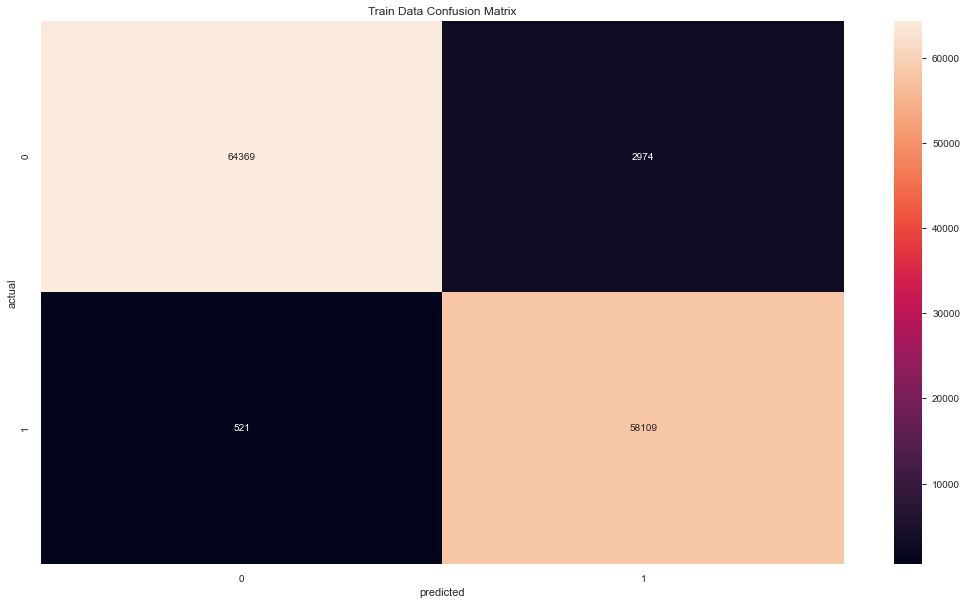

In [83]:
attack_prediction_train['predicted'] = attack_prediction_train['predicted'].apply(lambda x: 1 if x > 0.20 else 0)
sns.heatmap(pd.crosstab(attack_prediction_train['actual'], attack_prediction_train['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()

In [98]:
train_accuracy_logistic = metrics.accuracy_score(attack_prediction_train.actual,attack_prediction_train.predicted) ## Accuracy is around 97% on train data

### Predictions on testing

In [86]:
test_gini = 2*metrics.roc_auc_score(test_final['attack_type'], result.predict(test_final[imp_features])) - 1
print("The Gini Index for the model built on the Train Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.8751554459851687


In [87]:
## Simple predictions: ## On training data
attack_prediction_test =pd.DataFrame({'actual':test_final.attack_type,'predicted':result.predict(test_final[imp_features])})

In [88]:
attack_prediction_test.head(5)

actual  predicted
0       1   0.999950
1       1   0.999869
2       0   0.052673
3       1   0.991619
4       1   0.938219

In [89]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = attack_prediction_test.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['predicted'] = train_temp['predicted'].apply(lambda x: 0 if x < cut_off else 1)
    train_temp['tp'] = train_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==1 else 0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==1 else 0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==0 else 0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==0 else 0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

train_temp.sum() ## Here we are seeing that our model is predicting almost accurate outputs

actual       12833
predicted    22544
tp           12833
fp            9711
tn               0
fn               0
dtype: int64

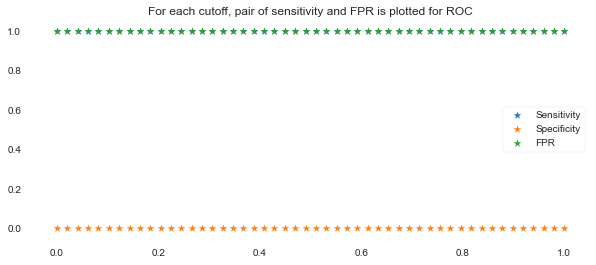

In [90]:
plt.subplots(figsize=(10,4))
plt.scatter(roc_like_df['cutoff'], roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(roc_like_df['cutoff'], 1-roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

In [91]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()] ## We can use any of this cutoff

cutoff  sensitivity  specificity  total
0  0.000000          1.0          0.0    1.0
0  0.020408          1.0          0.0    1.0
0  0.040816          1.0          0.0    1.0
0  0.061224          1.0          0.0    1.0
0  0.081633          1.0          0.0    1.0
0  0.102041          1.0          0.0    1.0
0  0.122449          1.0          0.0    1.0
0  0.142857          1.0          0.0    1.0
0  0.163265          1.0          0.0    1.0
0  0.183673          1.0          0.0    1.0
0  0.204082          1.0          0.0    1.0
0  0.224490          1.0          0.0    1.0
0  0.244898          1.0          0.0    1.0
0  0.265306          1.0          0.0    1.0
0  0.285714          1.0          0.0    1.0
0  0.306122          1.0          0.0    1.0
0  0.326531          1.0          0.0    1.0
0  0.346939          1.0          0.0    1.0
0  0.367347          1.0          0.0    1.0
0  0.387755          1.0          0.0    1.0
0  0.408163          1.0          0.0    1.0
0  0.428571          1.0          0.0    1.0
0  0.448980          1.0          0.0    1.0
0  0.469388          1.0          0.0    1.0
0  0.489796          1.0          0.0    1.0
0  0.510204          1.0          0.0    1.0
0  0.530612          1.0          0.0    1.0
0  0.551020          1.0          0.0    1.0
0  0.571429          1.0          0.0    1.0
0  0.591837          1.0          0.0    1.0
0  0.612245          1.0          0.0    1.0
0  0.632653          1.0          0.0    1.0
0  0.653061          1.0          0.0    1.0
0  0.673469          1.0          0.0    1.0
0  0.693878          1.0          0.0    1.0
0  0.714286          1.0          0.0    1.0
0  0.734694          1.0          0.0    1.0
0  0.755102          1.0          0.0    1.0
0  0.775510          1.0          0.0    1.0
0  0.795918          1.0          0.0    1.0
0  0.816327          1.0          0.0    1.0
0  0.836735          1.0          0.0    1.0
0  0.857143          1.0          0.0    1.0
0  0.877551          1.0          0.0    1.0
0  0.897959          1.0          0.0    1.0
0  0.918367          1.0          0.0    1.0
0  0.938776          1.0          0.0    1.0
0  0.959184          1.0          0.0    1.0
0  0.979592          1.0          0.0    1.0
0  1.000000          1.0          0.0    1.0

### For testing data also we will use 2nd cutoff

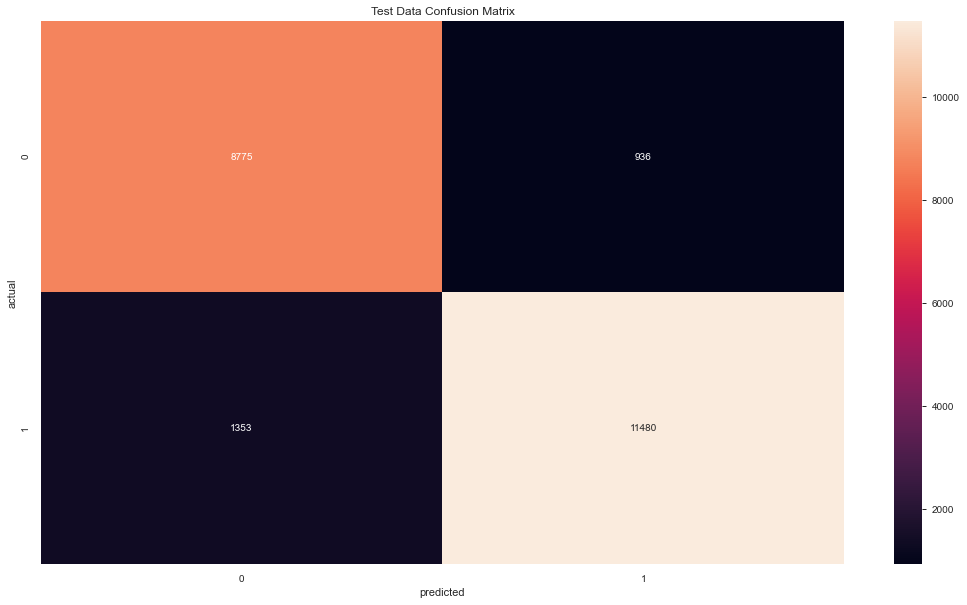

In [92]:
attack_prediction_test['predicted'] = attack_prediction_test['predicted'].apply(lambda x: 1 if x > 0.20 else 0)
sns.heatmap(pd.crosstab(attack_prediction_test['actual'], attack_prediction_test['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [94]:
attack_prediction_test.head(5)

actual  predicted
0       1          1
1       1          1
2       0          0
3       1          1
4       1          1

In [96]:
test_accuracy_logistic=metrics.accuracy_score(attack_prediction_test.actual,attack_prediction_test.predicted) ## 89% accuracy on our testing data

In [100]:
print('Accuracy on Training:',train_accuracy_logistic)
print('Accuracy on Testing:',test_accuracy_logistic)

Accuracy on Training: 0.9722559596103927
Accuracy on Testing: 0.8984652235628106


<center>
<h1> Decision Trees

In [320]:
from sklearn.tree import DecisionTreeClassifier

In [321]:
from sklearn.tree import export_graphviz, export
from sklearn.model_selection import GridSearchCV

In [322]:
dtc = DecisionTreeClassifier()

In [323]:
param_grid = {'max_depth':np.arange(1,8),
             'max_features': np.arange(3,8),
              'criterion':['gini','entropy']}

In [324]:
tree=GridSearchCV(dtc,param_grid,cv=10)

In [325]:
tree.fit(train_final[imp_features],train_final.attack_type)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [170]:
tree.best_score_

0.9889738449129911

In [326]:
tree.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 6}

In [327]:
##Now we will build the model on best parameters:
tree1 = DecisionTreeClassifier(criterion='gini',max_depth=7,max_features=6)

In [328]:
tree1.fit(train_final[imp_features],train_final.attack_type)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [102]:
train_gini = 2*metrics.roc_auc_score(train_final.attack_type,tree1.predict(train_final[imp_features])) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

The Gini Index for the model built on the Train Data is :  0.9790137055478703


### Predictions

In [329]:
tree_Train = pd.DataFrame({'actual':train_final.attack_type,'predicted':tree1.predict(train_final[imp_features])})

In [330]:
tree_Train.head(5)

actual  predicted
0       0          0
1       0          0
2       1          1
3       0          0
4       0          0

In [331]:
acc_train = metrics.accuracy_score(tree_Train.actual,tree_Train.predicted) ## We have around 98% acc on train model

In [332]:
cm=metrics.confusion_matrix(tree_Train.actual,tree_Train.predicted)

### Confusion matrix tells us that how many times we have been attacked and how many times there were no attacks

Text(0.5, 66.5, 'Predicted Label')

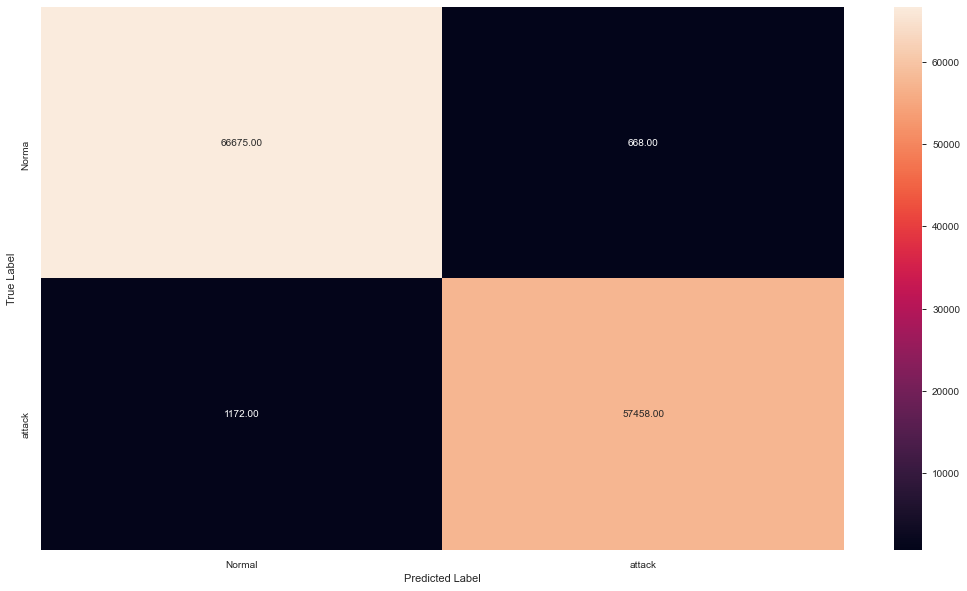

In [333]:
sns.heatmap(cm,annot = True,fmt = '.2f',xticklabels=['Normal','attack'],yticklabels=['Norma','attack'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

In [108]:
train_final.attack_type.value_counts()

0    67343
1    58630
Name: attack_type, dtype: int64

### Testing data

In [334]:
tree_Test = pd.DataFrame({'actual':test_final.attack_type,'predicted':tree1.predict(test_final[imp_features])})

In [336]:
tree_Test.head(5)

actual  predicted
0       1          1
1       1          1
2       0          0
3       1          1
4       1          0

In [337]:
test_gini = 2*metrics.roc_auc_score(test_final.attack_type,tree1.predict(test_final[imp_features])) - 1
print("The Gini Index for the model built on the Train Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.6506734649286938


In [338]:
acc_test = metrics.accuracy_score(tree_Test.actual,tree_Test.predicted) 

In [339]:
acc_test  ## We have around 80% acc on train model

0.8044712562100781

In [341]:
cm1=metrics.confusion_matrix(tree_Test.actual,tree_Test.predicted)
cm1

array([[9478,  233],
       [4175, 8658]], dtype=int64)

Text(0.5, 66.5, 'Predicted Label')

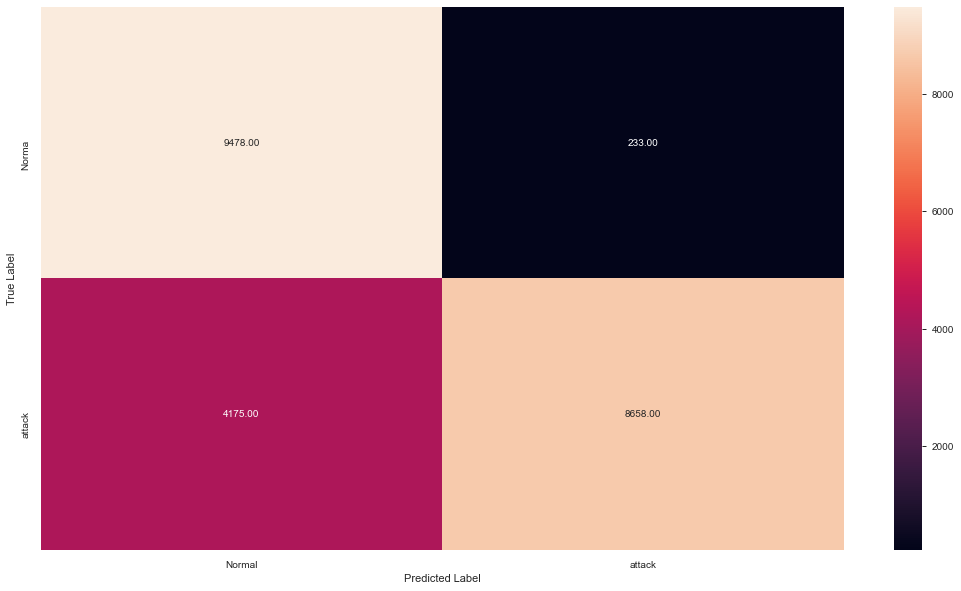

In [342]:
sns.heatmap(cm1,annot = True,fmt = '.2f',xticklabels=['Normal','attack'],yticklabels=['Norma','attack'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

In [116]:
test_final.attack_type.value_counts()

1    12833
0     9711
Name: attack_type, dtype: int64

In [343]:
print('Final_ACCURACY','Decision Trees',acc_train,acc_test) ## 98 % on training anf 80% on testing 

Final_ACCURACY Decision Trees 0.985393695474427 0.8044712562100781


<center>
<h1>Random Forest

In [ ]:
RandomForestClassifier

In [347]:
param_grid1={'n_estimators':[100,200,300,400],
'max_depth':np.arange(1,10),}

In [348]:
rndm_frst = GridSearchCV(RandomForestClassifier(warm_start = True),param_grid1 , cv = 2)

In [349]:
rndm_frst.fit(train_final[imp_features],train_final.attack_type)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [350]:
rndm_frst.best_params_

{'max_depth': 9, 'n_estimators': 400}

In [351]:
rdm=RandomForestClassifier(n_estimators = 400,max_depth= 9)

In [352]:
rdm.fit(train_final[imp_features],train_final.attack_type)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [353]:
rdm_fr_train = pd.DataFrame({'actual':train_final.attack_type,'predicted':rdm.predict(train_final[imp_features])})

In [354]:
rdm_fr_train.head(5) ## Predictions are almost accurate with random forest as well:

actual  predicted
0       0          0
1       0          0
2       1          1
3       0          0
4       0          0

In [355]:
accu_random_train = metrics.accuracy_score(rdm_fr_train.actual,rdm_fr_train.predicted) ##
accu_random_train

0.9983806053678169

In [356]:
metrics.confusion_matrix(rdm_fr_train.actual,rdm_fr_train.predicted)

array([[67161,   182],
       [   22, 58608]], dtype=int64)

In [357]:
cm3=metrics.confusion_matrix(rdm_fr_train.actual,rdm_fr_train.predicted)

Text(0.5, 66.5, 'Predicted Label')

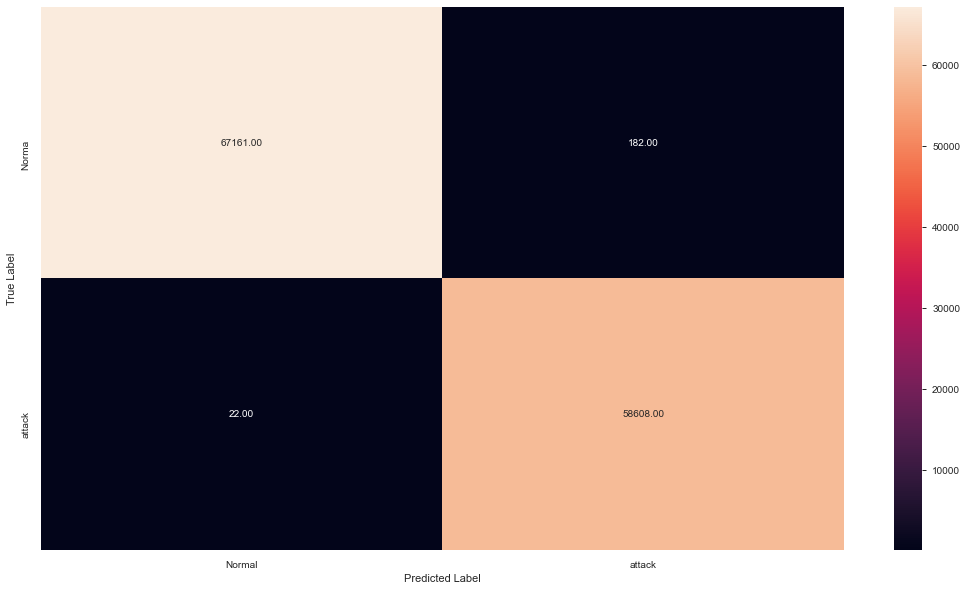

In [358]:
sns.heatmap(cm3,annot = True,fmt = '.2f',xticklabels=['Normal','attack'],yticklabels=['Norma','attack'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

## Testing data

In [359]:
## Predictions on testing data
rdm_fr_test = pd.DataFrame({'actual':test_final.attack_type,'predicted':rdm.predict(test_final[imp_features])})

In [360]:
rdm_fr_test.head(5)

actual  predicted
0       1          1
1       1          1
2       0          0
3       1          1
4       1          1

In [361]:
## Accuracy checking after predictions
acc_test_random = metrics.accuracy_score(rdm_fr_test.actual,rdm_fr_test.predicted)
acc_test_random

0.8171132008516678

In [362]:
metrics.confusion_matrix(rdm_fr_test.actual,rdm_fr_test.predicted)

array([[9427,  284],
       [3839, 8994]], dtype=int64)

In [363]:
cm4=metrics.confusion_matrix(rdm_fr_test.actual,rdm_fr_test.predicted)

Text(0.5, 66.5, 'Predicted Label')

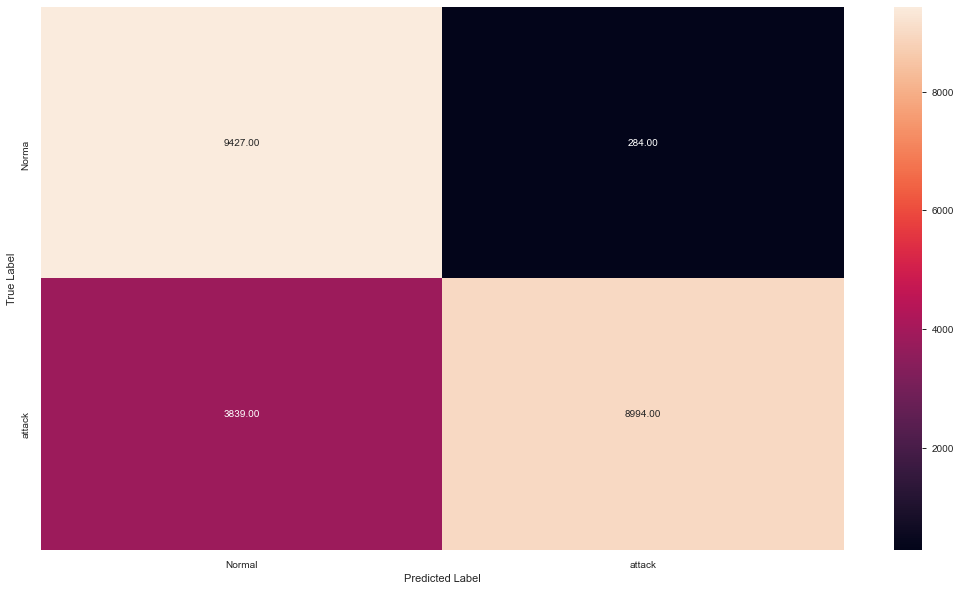

In [364]:
sns.heatmap(cm4,annot = True,fmt = '.2f',xticklabels=['Normal','attack'],yticklabels=['Norma','attack'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

### Accuracy of predictions till now

In [365]:
print('Final_Accuracy','Decision Trees',acc_train,acc_test)
print('Final_Accuracy','Random Forest',accu_random_train,acc_test_random)

Final_Accuracy Decision Trees 0.985393695474427 0.8044712562100781
Final_Accuracy Random Forest 0.9983806053678169 0.8171132008516678


<center>
<h1>Boosting

In [368]:
from xgboost.sklearn import XGBClassifier

In [369]:
param_grid1={'learning_rate':[10 ** x for x in range(-3,1)],
'max_depth':np.arange(1,10),}

In [370]:
xgb=GridSearchCV(XGBClassifier(),param_grid=param_grid1,cv =2, verbose = False)

In [371]:
xgb.fit(train_final[imp_features],train_final.attack_type)

GridSearchCV(cv=2, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=Non

In [372]:
xgb.best_params_

{'learning_rate': 1, 'max_depth': 3}

In [373]:
xgb1=XGBClassifier(max_depth =3,learning_rate =1)

In [374]:
xgb1.fit(train_final[imp_features],train_final.attack_type)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [375]:
## Predictions on testing data
xbc_train = pd.DataFrame({'actual':train_final.attack_type,'predicted':xgb1.predict(train_final[imp_features])})

In [376]:
xbc_train.head(5) ## Predictions are correct so far 

actual  predicted
0       0          0
1       0          0
2       1          1
3       0          0
4       0          0

In [377]:
acc_xgb_train = metrics.accuracy_score(xbc_train.actual,xbc_train.predicted)

In [378]:
metrics.confusion_matrix(xbc_train.actual,xbc_train.predicted)

array([[67341,     2],
       [    1, 58629]], dtype=int64)

In [379]:
cm5=metrics.confusion_matrix(xbc_train.actual,xbc_train.predicted)

Text(0.5, 66.5, 'Predicted Label')

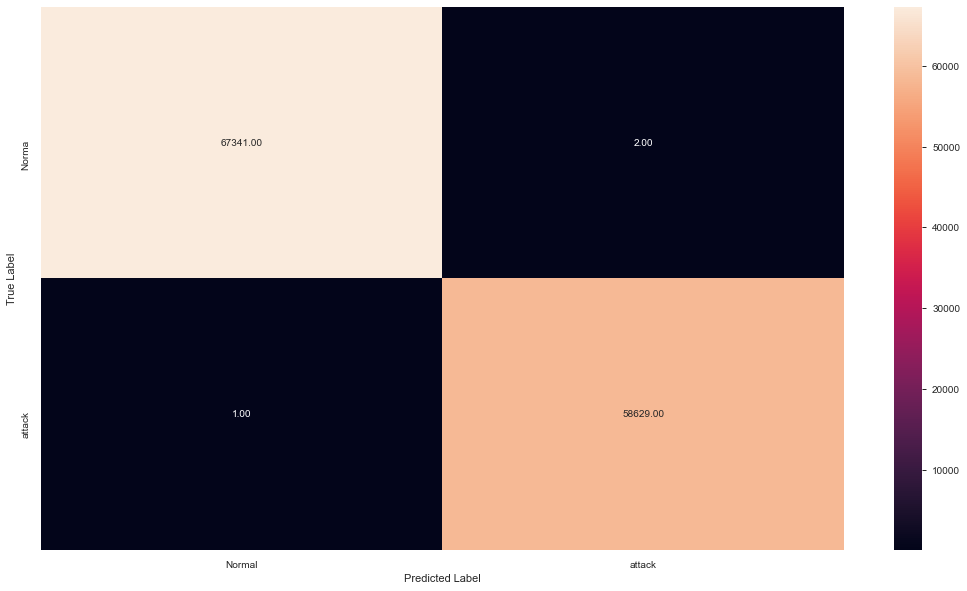

In [380]:
sns.heatmap(cm5,annot = True,fmt = '.2f',xticklabels=['Normal','attack'],yticklabels=['Norma','attack'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

### Testing data

In [381]:
## Predictions on testing data
xbc_test = pd.DataFrame({'actual':test_final.attack_type,'predicted':xgb1.predict(test_final[imp_features])})

In [382]:
xbc_test.head(5)

actual  predicted
0       1          1
1       1          1
2       0          0
3       1          1
4       1          1

In [384]:
acc_test_xgb=metrics.accuracy_score(xbc_test.actual,xbc_test.predicted)
acc_test_xgb

0.8181777856635912

In [385]:
metrics.confusion_matrix(xbc_test.actual,xbc_test.predicted)

array([[9417,  294],
       [3805, 9028]], dtype=int64)

In [386]:
cm6=metrics.confusion_matrix(xbc_test.actual,xbc_test.predicted)

Text(0.5, 66.5, 'Predicted Label')

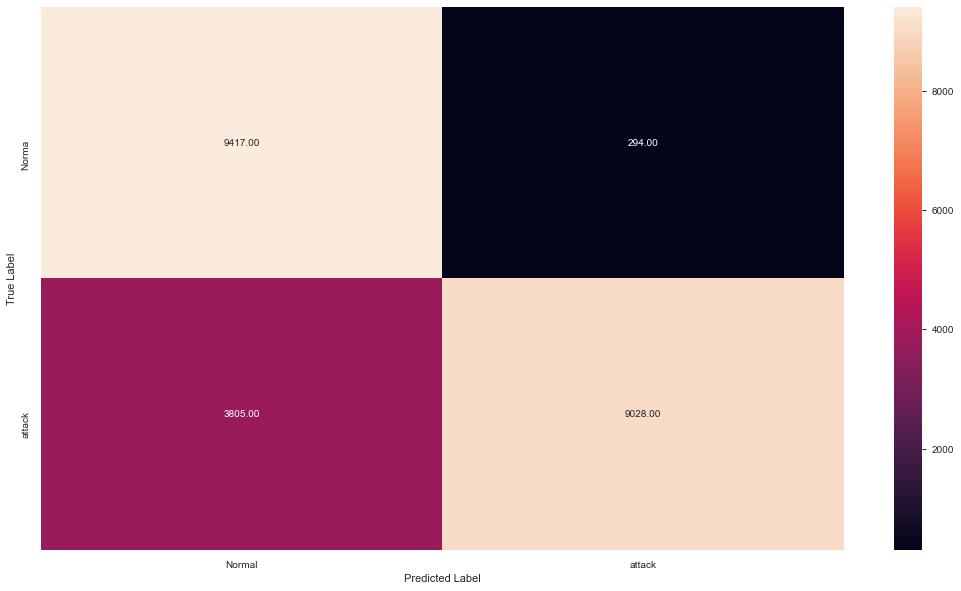

In [387]:
sns.heatmap(cm6,annot = True,fmt = '.2f',xticklabels=['Normal','attack'],yticklabels=['Norma','attack'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

#### Final accuracies

In [388]:
print('Final_Accuracy','Decision Trees',acc_train,acc_test)
print('Final_Accuracy','Random Forest',accu_random_train,acc_test_random)
print('Final_Accuracy','XGBoosting',acc_xgb_train,acc_test_xgb)
print('Final_Accuracy:','Logistic_Regression',train_accuracy_logistic,test_accuracy_logistic)

Final_Accuracy Decision Trees 0.985393695474427 0.8044712562100781
Final_Accuracy Random Forest 0.9983806053678169 0.8171132008516678
Final_Accuracy XGBoosting 0.9999761853730561 0.8181777856635912


### We need to check for overfitting issue here as our model accuracy is very high

### This shows that our average accuracy from xgboost model is around 99.7% after running cross validation

In [389]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(xgb1, test_final[imp_features], test_final.attack_type, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\ZomAdmin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10-fold cross validation average accuracy: 0.997


In [ ]:
xgb1

<center>
<h1>MultiNomial classification

In [390]:
namss=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot",
       "num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", 
       "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","count","srv_count","serror_rate", 
       "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate",
"srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate",
 "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", 
 "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [391]:
Train=pd.read_table('C:/Users/ZomAdmin/Desktop/Data Science with python/Python Session 28/MAIN CASE STUDIES - ML/3. Network Intrusion Detection System/NSL_Dataset/Train.txt',sep = ',',names = namss)

In [392]:
Test=pd.read_csv('C:/Users/ZomAdmin/Desktop/Data Science with python/Python Session 28/MAIN CASE STUDIES - ML/3. Network Intrusion Detection System/NSL_Dataset/Test.txt',sep = ',',names = namss)

In [393]:
Train.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

    attack  last_flag  
0   normal         20  
1   normal         15  
2  neptune         19  
3   normal         21  
4   normal         21  

[5 rows x 43 columns]

In [41]:
Test.head(5)

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.04   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.61   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.31   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.06                         0.00   
2                    0.04                         0.61   
3                    0.00                         1.00   
4                    0.17                         0.03   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                   0.0   
1                         0.00                   0.0   
2                         0.02                   0.0   
3                         0.28                   0.0   
4                         0.02                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                  1.00                      1.00   
1                       0.0                  1.00                      1.00   
2                       0.0                  0.00                      0.00   
3                       0.0                  0.00                      0.00   
4                       0.0                  0.83                      0.71   

    attack  last_flag  
0  neptune         21  
1  neptune         21  
2   normal         21  
3    saint         15  
4    mscan         11  

[5 rows x 43 columns]

### Defining Y Variable

In [394]:
### Here we are creating list of attacks to define Y variable:

DoS_attack_1=['neptune','smurf','back','teardrop','pod','land','apache2','processtable','worm','udpstorm '] 


Probe_attack_2=['satan','ipsweep','portsweep','nmap','mscan','saint'] 


R2L_attack_3=['warezclient','guess_passwd','warezmaster','imap','ftp_write','multihop','phf','spy','snmpguess','mailbomb',
          'snmpgetattack ','httptunnel','named','sendmail','xsnoop','Xlock'] 


U2R_attack_4=['buffer_overflow','rootkit','loadmodule','perl','ps','xterm','sqlattack']

In [395]:
#Creating the dependent variable for train data which will contain 0 for normal, 1 for dos,2 for probe ,3 for R2L and 4 for U2R

Train['attack_type']=Train['attack'].apply(lambda x: 1 if x in DoS_attack_1 else 2 if x in Probe_attack_2 else 3 if x in R2L_attack_3 else 4 if x in U2R_attack_4 else 0)

In [396]:
Train.attack_type.value_counts() ## Value counts of our attack types:

0    67343
1    45927
2    11656
3      995
4       52
Name: attack_type, dtype: int64

In [397]:
#Creating the dependent variable for train data which will contain 0 for normal, 1 for dos,2 for probe ,3 for R2L and 4 for U2R

Test['attack_type']=Test['attack'].apply(lambda x: 1 if x in DoS_attack_1 else 2 if x in Probe_attack_2 else 3 if x in R2L_attack_3 else 4 if x in U2R_attack_4 else 0)

In [398]:
Test.attack_type.value_counts()  ## Value counts of our attack types:

0    9900
1    7165
3    2991
2    2421
4      67
Name: attack_type, dtype: int64

### Seggragation of data

In [399]:
cat_var = Train.select_dtypes('object')

In [400]:
cat_var.columns

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [401]:
cont_var = Train.columns.difference(['protocol_type','service','flag','attack'])

In [402]:
cont_var_train = Train[cont_var]

In [403]:
cont_var_train.isna().sum()

attack_type                    0
count                          0
diff_srv_rate                  0
dst_bytes                      0
dst_host_count                 0
dst_host_diff_srv_rate         0
dst_host_rerror_rate           0
dst_host_same_src_port_rate    0
dst_host_same_srv_rate         0
dst_host_serror_rate           0
dst_host_srv_count             0
dst_host_srv_diff_host_rate    0
dst_host_srv_rerror_rate       0
dst_host_srv_serror_rate       0
duration                       0
hot                            0
is_guest_login                 0
is_host_login                  0
land                           0
last_flag                      0
logged_in                      0
num_access_files               0
num_compromised                0
num_failed_logins              0
num_file_creations             0
num_outbound_cmds              0
num_root                       0
num_shells                     0
rerror_rate                    0
root_shell                     0
same_srv_r

### Testing data

In [404]:
cat_var = Test.select_dtypes('object')

In [405]:
cont_var = Test.columns.difference(['protocol_type','service','flag','attack'])

In [406]:
cont_var_test = Test[cont_var]

In [407]:
## Clipped outliers as 0.01 for lower limit and 0.99 for upper limit
cont_var_train = cont_var_train.apply(lambda x: x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99)))
cont_var_test = cont_var_test.apply(lambda x: x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99)))

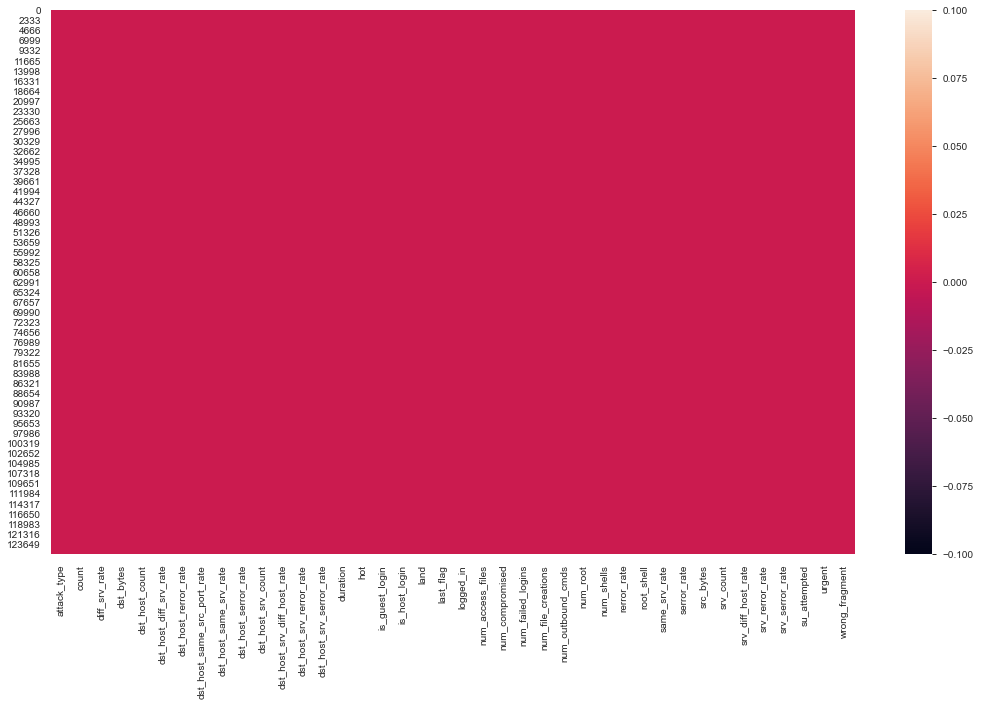

In [408]:
sns.heatmap(cont_var_train.isna()) ## No missing values:

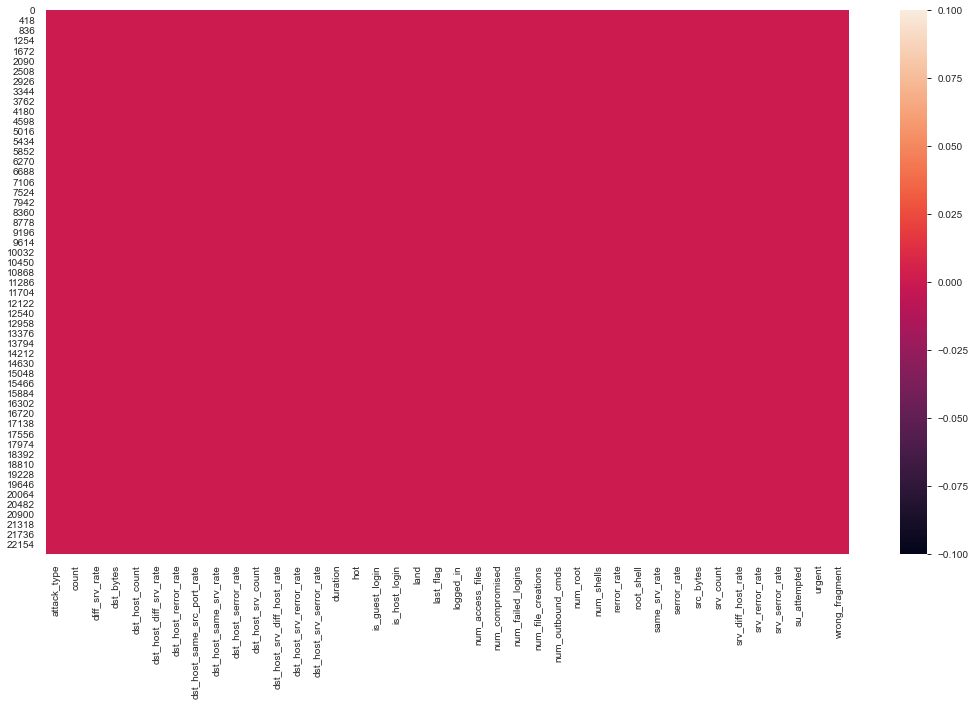

In [409]:
sns.heatmap(cont_var_test.isna()) ## No missing values:

## Dummy variables

In [61]:
cat_var.isna().sum()

protocol_type    0
service          0
flag             0
attack           0
dtype: int64

In [410]:
#Dummies creation for the categorical variable of test dataset

dummy_protocol_type=pd.get_dummies(Test['protocol_type'],prefix='protocol',drop_first=True)
dummy_service=pd.get_dummies(Test['service'],prefix='service',drop_first=True)
dummy_flag=pd.get_dummies(Test['flag'],prefix='flag',drop_first=True)

In [411]:
test_final1=pd.concat([cont_var_test,dummy_protocol_type,dummy_service,dummy_flag],axis=1)

In [412]:
test_final1.isna().sum()

attack_type       0
count             0
diff_srv_rate     0
dst_bytes         0
dst_host_count    0
                 ..
flag_S1           0
flag_S2           0
flag_S3           0
flag_SF           0
flag_SH           0
Length: 115, dtype: int64

In [413]:
#Dummies creation for the categorical variable of test dataset

dummy_protocol_type=pd.get_dummies(Train['protocol_type'],prefix='protocol',drop_first=True)
dummy_service=pd.get_dummies(Train['service'],prefix='service',drop_first=True)
dummy_flag=pd.get_dummies(Train['flag'],prefix='flag',drop_first=True)

In [416]:
train_final1 = pd.concat([cont_var_train,dummy_protocol_type,dummy_service,dummy_flag],axis=1)

In [418]:
train_final1.shape

(125973, 121)

In [417]:
test_final1.shape

(22544, 115)

### Variable Selection

In [419]:
from sklearn.ensemble import RandomForestClassifier

In [421]:
rfc = RandomForestClassifier()

In [422]:
X_var = list(train_final1.columns.difference(['attack_type']))
y = train_final1.attack_type

In [423]:
rfc.fit(train_final1[X_var],train_final1.attack_type)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [424]:
#Calculating the feature importances to choose best variables and dimentionality reduction

scores = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_final1[X_var].columns,'importance':scores})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

### These are the few variable which are most important for our analysis

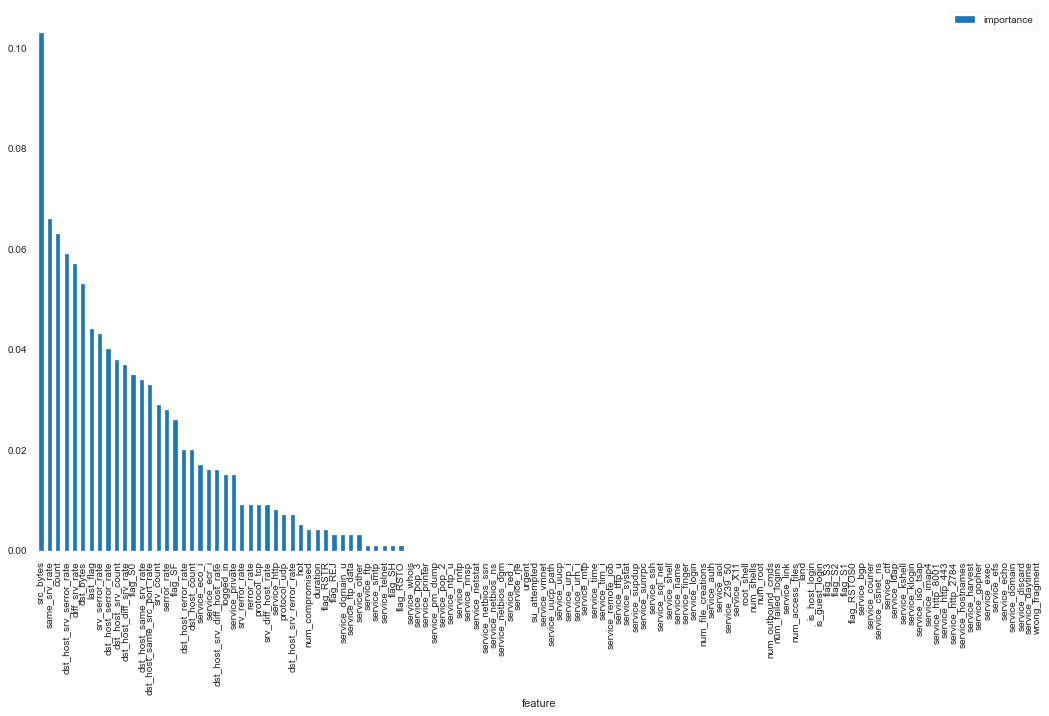

In [425]:
#this is the ranked order of the best variables in descending order
plt.rcParams['figure.figsize'] = (18, 10)
importances.plot.bar() ## This is Showing us 40 variables which are of higher importance

## SelectKBest and chi2

## Statistical tests can be used to select those features which have strongest corelation with target variable

## Scikit learn library provides the SelectKBest class that can be used with suite of different statistical test to select limited number of features

In [426]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [427]:
X_var = list(train_final1.columns.difference(['attack_type']))
y = train_final1.attack_type

In [428]:
best_features = SelectKBest(score_func = chi2,k = 30)
fit = best_features.fit(train_final1[X_var],train_final1.attack_type)

In [429]:
dfscores = pd.DataFrame(fit.scores_)
dfscores = round(dfscores,1)
dffeatures = pd.DataFrame(train_final1[X_var].columns)

In [430]:
df=pd.concat([dffeatures,dfscores],axis = 1)
df.columns = ['features','scores']

In [431]:
### Here we are selecting top 50 features for further analysis
df_fea = df.sort_values('scores',ascending = False).head(50)

In [432]:
features_50 = df_fea.loc[:,'features']

In [433]:
features_50.count() ## Here we have selected 50 features

50

## F_Regression

In [110]:
from sklearn.feature_selection import f_regression

In [113]:
variables = train_final1[features_50]
target = train_final1.attack_type

In [114]:
col_ser=pd.Series(variables.columns)
F_values, p_values  = f_regression( variables, target )
# combine the output in dataframe
F_regression_op = pd.DataFrame([col_ser, F_values.round(2), p_values.round()]).T

# add the column names
F_regression_op.columns = ['Features', 'F_values', 'p_values', ]

In [115]:
F_regression_op ## All the variables are important as per the F regression technique

Features F_values p_values
0                     dst_bytes   9420.9        0
1                      duration  1012.95        0
2                         count  25820.5        0
3            dst_host_srv_count  86874.3        0
4                     src_bytes    48.49        0
5                dst_host_count  6181.65        0
6                     srv_count   182.45        0
7                       flag_S0  23393.3        0
8      dst_host_srv_serror_rate  25020.2        0
9               srv_serror_rate  24130.2        0
10                  serror_rate  24567.8        0
11         dst_host_serror_rate  24612.4        0
12                    logged_in  75265.4        0
13                      flag_SF  63418.1        0
14                service_eco_i  18012.1        0
15                 service_http  47181.7        0
16       dst_host_same_srv_rate  55165.7        0
17                same_srv_rate  51848.4        0
18  dst_host_same_src_port_rate  13618.6        0
19              service_private    26970        0
20                    flag_RSTR  9674.67        0
21       dst_host_diff_srv_rate  25494.8        0
22              srv_rerror_rate  14830.8        0
23     dst_host_srv_rerror_rate  14882.3        0
24                  rerror_rate  14702.3        0
25         dst_host_rerror_rate  13188.3        0
26                    last_flag  52719.5        0
27           srv_diff_host_rate    28.19        0
28  dst_host_srv_diff_host_rate  8269.57        0
29             service_domain_u  7338.86        0
30                diff_srv_rate  12158.3        0
31                 protocol_udp  3154.28        0
32                 service_smtp  4905.03        0
33                service_other   516.18        0
34                     flag_REJ  5826.25        0
35                service_ecr_i  1059.29        0
36                      flag_SH  1234.53        0
37                 protocol_tcp   551.08        0
38               service_Z39_50   388.05        0
39                 service_uucp   352.92        0
40              service_courier   327.18        0
41                    flag_RSTO    498.8        0
42                  service_bgp   322.98        0
43             service_ftp_data   623.36        0
44             service_iso_tsap    315.2        0
45            service_uucp_path   318.09        0
46                service_whois   340.58        0
47                 service_nnsp   282.77        0
48                service_vmnet    283.3        0
49                service_imap4    312.6        0

## VIF - Variance Inflation Factor

In [434]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [435]:
# separate the Y and X variables
param='attack_type ~ ' + '+'.join(features_50)

In [436]:
y, X = dmatrices(param, train_final1, return_type = 'dataframe' )

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF_Factor'] = [ variance_inflation_factor(X.values, i) for i in range(X.shape[1]) ]

# display the output
vif.round(1).head(1)

Features  VIF_Factor
0  Intercept       806.4

In [123]:
vif.sort_values('VIF_Factor',ascending = True)

Features  VIF_Factor
49                service_vmnet    1.032970
47                service_whois    1.035758
50                service_imap4    1.036041
46            service_uucp_path    1.036328
45             service_iso_tsap    1.038459
43                  service_bgp    1.038643
48                 service_nnsp    1.038711
41              service_courier    1.045039
39               service_Z39_50    1.045901
40                 service_uucp    1.058652
5                     src_bytes    1.257186
1                     dst_bytes    1.359165
2                      duration    1.646355
28           srv_diff_host_rate    1.702693
27                    last_flag    1.875259
37                      flag_SH    1.931460
44             service_ftp_data    1.997618
20              service_private    2.094055
31                diff_srv_rate    2.283373
34                service_other    2.327920
6                dst_host_count    2.440069
33                 service_smtp    2.673174
29  dst_host_srv_diff_host_rate    3.318550
22       dst_host_diff_srv_rate    3.321879
19  dst_host_same_src_port_rate    3.545657
7                     srv_count    5.030680
30             service_domain_u    5.254488
3                         count    5.370461
36                service_ecr_i    7.670469
16                 service_http    9.380693
4            dst_host_srv_count    9.907011
26         dst_host_rerror_rate   10.416230
15                service_eco_i   10.632079
42                    flag_RSTO   12.018994
18                same_srv_rate   13.303870
13                    logged_in   13.542271
17       dst_host_same_srv_rate   14.347975
21                    flag_RSTR   17.843787
24     dst_host_srv_rerror_rate   21.587650
32                 protocol_udp   27.110040
38                 protocol_tcp   40.726777
12         dst_host_serror_rate   47.514726
9      dst_host_srv_serror_rate   70.728937
25                  rerror_rate   72.639181
35                     flag_REJ   75.377208
8                       flag_S0   76.884771
14                      flag_SF   96.648257
23              srv_rerror_rate   97.411647
11                  serror_rate  119.167626
10              srv_serror_rate  144.441608
0                     Intercept  806.357257

### Now we will start removing variabls with every iterations

### 2ND Iteration

In [124]:
# separate the Y and X variables
'attack_type ~ ' + '+'.join(features_50)

'attack_type ~ dst_bytes+duration+count+dst_host_srv_count+src_bytes+dst_host_count+srv_count+flag_S0+dst_host_srv_serror_rate+srv_serror_rate+serror_rate+dst_host_serror_rate+logged_in+flag_SF+service_eco_i+service_http+dst_host_same_srv_rate+same_srv_rate+dst_host_same_src_port_rate+service_private+flag_RSTR+dst_host_diff_srv_rate+srv_rerror_rate+dst_host_srv_rerror_rate+rerror_rate+dst_host_rerror_rate+last_flag+srv_diff_host_rate+dst_host_srv_diff_host_rate+service_domain_u+diff_srv_rate+protocol_udp+service_smtp+service_other+flag_REJ+service_ecr_i+flag_SH+protocol_tcp+service_Z39_50+service_uucp+service_courier+flag_RSTO+service_bgp+service_ftp_data+service_iso_tsap+service_uucp_path+service_whois+service_nnsp+service_vmnet+service_imap4'

In [437]:
param='attack_type ~ dst_bytes+duration+count+dst_host_srv_count+src_bytes+dst_host_count+srv_count+dst_host_srv_serror_rate+dst_host_serror_rate+logged_in+service_eco_i+service_http+dst_host_same_srv_rate+same_srv_rate+dst_host_same_src_port_rate+service_private+flag_RSTR+dst_host_diff_srv_rate+dst_host_srv_rerror_rate+rerror_rate+dst_host_rerror_rate+last_flag+srv_diff_host_rate+dst_host_srv_diff_host_rate+service_domain_u+diff_srv_rate+protocol_udp+service_smtp+service_other+flag_REJ+service_ecr_i+flag_SH+protocol_tcp+service_Z39_50+service_uucp+service_courier+flag_RSTO+service_bgp+service_ftp_data+service_iso_tsap+service_uucp_path+service_whois+service_nnsp+service_vmnet+service_imap4'

In [438]:
y, X = dmatrices(param, train_final1, return_type = 'dataframe' )

# For each X, calculate VIF and save in dataframe
vif2 = pd.DataFrame()

vif2['Features'] = X.columns
vif2['VIF_Factor'] = [ variance_inflation_factor(X.values, i) for i in range(X.shape[1]) ]

# display the output
vif2.round(1).head(1)

Features  VIF_Factor
0  Intercept       434.5

In [127]:
vif2.sort_values('VIF_Factor',ascending = True)

Features  VIF_Factor
44                service_vmnet    1.032913
42                service_whois    1.035714
45                service_imap4    1.036018
41            service_uucp_path    1.036275
40             service_iso_tsap    1.038402
38                  service_bgp    1.038581
43                 service_nnsp    1.038676
36              service_courier    1.044971
34               service_Z39_50    1.045809
35                 service_uucp    1.058611
32                      flag_SH    1.206878
5                     src_bytes    1.243713
1                     dst_bytes    1.339954
2                      duration    1.641411
23           srv_diff_host_rate    1.693262
22                    last_flag    1.837018
39             service_ftp_data    1.988071
16              service_private    2.091553
26                diff_srv_rate    2.265661
29                service_other    2.326191
6                dst_host_count    2.425380
28                 service_smtp    2.652548
18       dst_host_diff_srv_rate    3.291180
24  dst_host_srv_diff_host_rate    3.307491
15  dst_host_same_src_port_rate    3.534574
7                     srv_count    5.028364
25             service_domain_u    5.243746
3                         count    5.366696
37                    flag_RSTO    6.619695
31                service_ecr_i    7.670237
12                 service_http    9.310864
4            dst_host_srv_count    9.886519
17                    flag_RSTR   10.172799
21         dst_host_rerror_rate   10.288222
11                service_eco_i   10.628566
10                    logged_in   11.302337
14                same_srv_rate   12.851761
13       dst_host_same_srv_rate   14.237394
19     dst_host_srv_rerror_rate   20.139628
27                 protocol_udp   27.100446
30                     flag_REJ   39.445993
9          dst_host_serror_rate   39.539241
33                 protocol_tcp   39.738552
8      dst_host_srv_serror_rate   43.636973
20                  rerror_rate   51.060929
0                     Intercept  434.543825

### 3RD Iteration

In [439]:
param='attack_type ~ dst_bytes+duration+count+dst_host_srv_count+src_bytes+dst_host_count+srv_count+logged_in+service_eco_i+service_http+dst_host_same_srv_rate+same_srv_rate+dst_host_same_src_port_rate+service_private+flag_RSTR+dst_host_diff_srv_rate+dst_host_srv_rerror_rate+dst_host_rerror_rate+last_flag+srv_diff_host_rate+dst_host_srv_diff_host_rate+service_domain_u+diff_srv_rate+service_smtp+service_other+service_ecr_i+flag_SH+service_Z39_50+service_uucp+service_courier+flag_RSTO+service_bgp+service_ftp_data+service_iso_tsap+service_uucp_path+service_whois+service_nnsp+service_vmnet+service_imap4'

In [440]:
y, X = dmatrices(param, train_final1, return_type = 'dataframe' )

# For each X, calculate VIF and save in dataframe
vif3 = pd.DataFrame()

vif3['Features'] = X.columns
vif3['VIF_Factor'] = [ variance_inflation_factor(X.values, i) for i in range(X.shape[1]) ]

# display the output
vif3.round(1).head(1)

Features  VIF_Factor
0  Intercept       195.9

In [130]:
vif3 ## We are almost left with those features who are highly related with our Y but we will still perform some feature selection

Features  VIF_Factor
0                     Intercept  195.862353
1                     dst_bytes    1.337892
2                      duration    1.627310
3                         count    5.193965
4            dst_host_srv_count    9.798524
5                     src_bytes    1.235499
6                dst_host_count    2.382845
7                     srv_count    4.946282
8                     logged_in    5.279219
9                 service_eco_i    3.637862
10                 service_http    8.819379
11       dst_host_same_srv_rate   14.025986
12                same_srv_rate    9.829211
13  dst_host_same_src_port_rate    3.287489
14              service_private    1.938883
15                    flag_RSTR    1.973893
16       dst_host_diff_srv_rate    3.199828
17     dst_host_srv_rerror_rate    8.751238
18         dst_host_rerror_rate    8.186400
19                    last_flag    1.774854
20           srv_diff_host_rate    1.690724
21  dst_host_srv_diff_host_rate    3.226600
22             service_domain_u    3.816173
23                diff_srv_rate    1.974560
24                 service_smtp    2.532611
25                service_other    2.070863
26                service_ecr_i    2.814302
27                      flag_SH    1.146120
28               service_Z39_50    1.044465
29                 service_uucp    1.056431
30              service_courier    1.043644
31                    flag_RSTO    1.179828
32                  service_bgp    1.037257
33             service_ftp_data    1.767969
34             service_iso_tsap    1.037181
35            service_uucp_path    1.035174
36                service_whois    1.034542
37                 service_nnsp    1.037579
38                service_vmnet    1.031915
39                service_imap4    1.034870

In [441]:
feature_columns3 = list(set(vif3.loc[:, 'Features']).difference(['Intercept']))

### Again running random_forest to see most important features

In [442]:
rfc = RandomForestClassifier()

In [443]:
rfc.fit(train_final1[feature_columns3],train_final1.attack_type)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [444]:
#Calculating the feature importances to choose best variables and dimentionality reduction

scores = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_final[feature_columns3].columns,'importance':scores})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

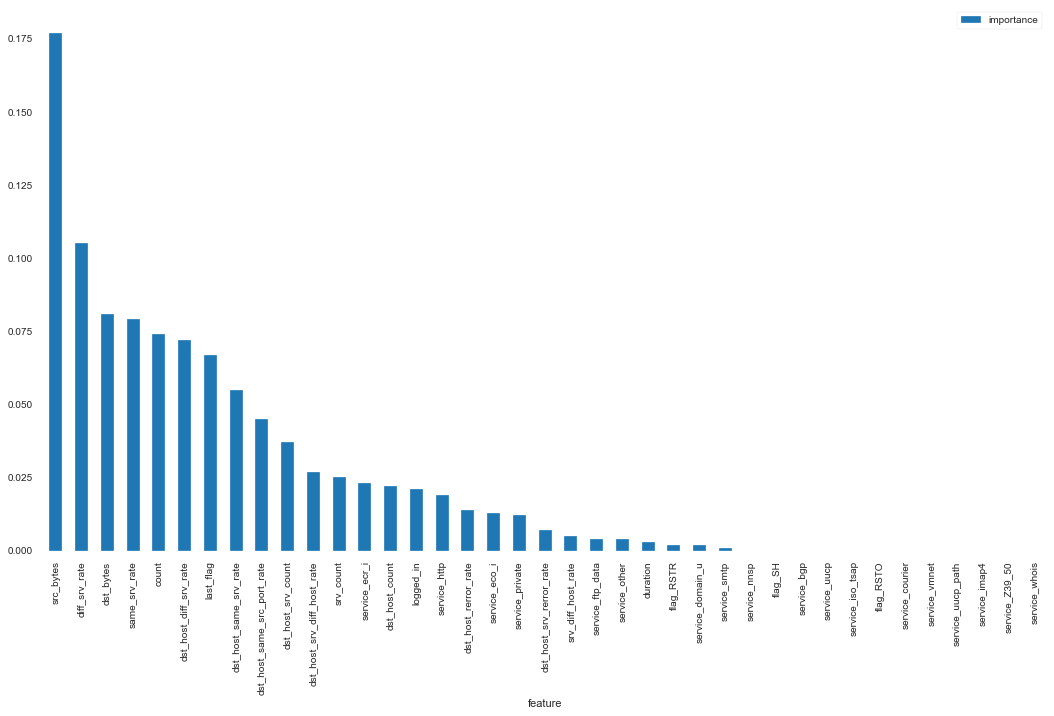

In [445]:
#this is the ranked order of the best variables in descending order
plt.rcParams['figure.figsize'] = (18, 10)
importances.plot.bar()

In [446]:
## Here is the list of most important 24 variables to build our model on
importances = importances.sort_values('importance',ascending=False).head(24)

In [447]:
importances

importance
feature                                
src_bytes                         0.177
diff_srv_rate                     0.105
dst_bytes                         0.081
same_srv_rate                     0.079
count                             0.074
dst_host_diff_srv_rate            0.072
last_flag                         0.067
dst_host_same_srv_rate            0.055
dst_host_same_src_port_rate       0.045
dst_host_srv_count                0.037
dst_host_srv_diff_host_rate       0.027
srv_count                         0.025
service_ecr_i                     0.023
dst_host_count                    0.022
logged_in                         0.021
service_http                      0.019
dst_host_rerror_rate              0.014
service_eco_i                     0.013
service_private                   0.012
dst_host_srv_rerror_rate          0.007
srv_diff_host_rate                0.005
service_other                     0.004
service_ftp_data                  0.004
duration                          0.003

In [448]:
importances.reset_index(inplace = True)

In [449]:
imp_features = importances.loc[:,'feature']

In [450]:
imp_features.count() ## Now we have 24 most impactful feature

24

<center>
<h1>Machine Learning

In [451]:
from sklearn.linear_model import LogisticRegression

In [452]:
logreg =LogisticRegression(multi_class='multinomial',class_weight='balanced')

In [453]:
logreg.fit(train_final1[imp_features],train_final1.attack_type)

C:\Users\ZomAdmin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

### Predictions

In [454]:
train_pred = pd.DataFrame({'actual':train_final1.attack_type,'predicted':logreg.predict(train_final1[imp_features])})

In [455]:
import sklearn.metrics 

In [457]:
## Accuracy is almost 82% on our training dataset 
log_train=metrics.accuracy_score(train_pred.actual,train_pred.predicted)
log_train

0.8247243456931247

In [458]:
# Confusion matrix for multinomial
metrics.confusion_matrix(train_pred.actual,train_pred.predicted)

array([[59437,  5341,  2565],
       [ 2382, 42824,   721],
       [ 5257,  5814,  1632]], dtype=int64)

### Testing data

In [459]:
test_pred = pd.DataFrame({'actual':test_final1.attack_type,'predicted':logreg.predict(test_final1[imp_features])})

In [461]:
### Here our model was performing good on training data but not very good on testing data
log_test=metrics.accuracy_score(test_pred.actual,test_pred.predicted)
log_test

0.611958836053939

In [462]:
metrics.confusion_matrix(test_pred.actual,test_pred.predicted)


array([[8835,  968,   97,    0],
       [1762, 4903,  500,    0],
       [1019, 1344,   58,    0],
       [2441,  500,  117,    0]], dtype=int64)

<center>
<h1> Decision Tree

In [463]:
from sklearn.tree import DecisionTreeClassifier

In [464]:
dtc = DecisionTreeClassifier()

In [465]:
param_grid={'max_depth':np.arange(1,6),
'max_features':np.arange(1,10),
'criterion':['gini','entropy']}

In [466]:
tree=GridSearchCV(dtc,param_grid,cv=10)

In [467]:
tree.fit(train_final1[imp_features],train_final1.attack_type)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [468]:
tree.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': 8}

In [469]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=5,max_features=8)

In [470]:
dtc.fit(train_final1[imp_features],train_final.attack_type)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [471]:
tre_train = pd.DataFrame({'actual':train_final1.attack_type,'predicted':dtc.predict(train_final1[imp_features])})

In [472]:
tre_train.head(5)

actual  predicted
0       0          0
1       0          1
2       1          1
3       0          0
4       0          0

In [473]:
decision_tree_train=metrics.accuracy_score(tre_train.actual,tre_train.predicted)
decision_tree_train ## We are getting 87% accuracy now

0.8774816825827757

### Testing data

In [474]:
tre_trest = pd.DataFrame({'actual':test_final1.attack_type,'predicted':dtc.predict(test_final1[imp_features])})

In [475]:
tre_trest.head(5)

actual  predicted
0       1          1
1       1          1
2       0          0
3       2          1
4       2          1

In [477]:
decision_tree_test=metrics.accuracy_score(tre_trest.actual,tre_trest.predicted)
decision_tree_test
## Model is still working fine as we are getting accuracy of 90%

0.6496185237757275

<center>
<h1>Random Forest

In [184]:
from sklearn.ensemble import RandomForestClassifier

In [186]:
rndmclf=RandomForestClassifier()

In [185]:
param_grid1={'n_estimators':[100,200,300,400],
'max_depth':np.arange(1,10),}

In [187]:
rndmclf_fr=GridSearchCV(RandomForestClassifier(warm_start = True),param_grid1 , cv = 2)

In [189]:
rndmclf_fr.fit(train_final1[imp_features],train_final1.attack_type)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [190]:
rndmclf_fr.best_params_

{'max_depth': 9, 'n_estimators': 300}

In [191]:
rndm=RandomForestClassifier(max_depth=9,n_estimators=300)

In [193]:
rndm.fit(train_final1[imp_features],train_final1.attack_type)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [194]:
random_train = pd.DataFrame({'actual':train_final1.attack_type,'predicted':rndm.predict(train_final1[imp_features])})

In [196]:
random_train.head(5)

actual  predicted
0       0          0
1       0          0
2       1          1
3       0          0
4       0          0

In [204]:
random_forest_train=metrics.accuracy_score(random_train.actual,random_train.predicted) ## 99% accuracy for training dataset

In [198]:
metrics.confusion_matrix(random_train.actual,random_train.predicted)

array([[67255,     2,    86],
       [   49, 45865,    13],
       [   40,     1, 12662]], dtype=int64)

### Testing dataset

In [199]:
random_test = pd.DataFrame({'actual':test_final1.attack_type,'predicted':rndm.predict(test_final1[imp_features])})

In [200]:
random_test.head(5)

actual  predicted
0       1          1
1       1          1
2       0          0
3       2          2
4       2          0

In [203]:
random_forest_test=metrics.accuracy_score(random_test.actual,random_test.predicted) ## Accuracy on testing data:

In [478]:
print('Accuracy','Logistic Regression:','Training',log_train,'Testing',log_test)
print('Accuracy','Decision Tree:','Training',decision_tree_train,'Testing',decision_tree_test)
print('Accuracy','Random Forest:','Training',random_forest_train,'Testing',random_forest_test)

Accuracy Logistic Regression: Training 0.8247243456931247 Testing 0.611958836053939
Accuracy Decision Tree: Training 0.8774816825827757 Testing 0.6496185237757275
Accuracy Random Forest: Training 0.9984838020845737 Testing 0.7592264017033357


### So the end conclusion is for multinomial model Random Forest was giving us best accuracy

### For binomial Logistic Regression was giving us best accuracy